In [1]:
import mdtraj as md
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math
from numpy import log2, zeros, mean, var, sum, loadtxt, arange, \
                  array, cumsum, dot, transpose, diagonal, floor
from numpy.linalg import inv, lstsq

In [6]:
pdb='./RegA_noCorN.pdb'
trajectory='./RegA_noCorN.xtc'
outdir='./output/'
if not os.path.exists('outdir'):
    os.makedirs('outdir')
    
print("outdir:",outdir)
print("pdb:",pdb)
print("trjaectory:",trajectory)

#NOTE: I removed the N terminal and C terminal loops, therefore these residues technically start
#at 22 and end at 275. This is not reflected in the pdb, so I will leave the numbering as it is. 

outdir: ./output/
pdb: ./RegA_noCorN.pdb
trjaectory: ./RegA_noCorN.xtc


In [7]:
trj = md.load(trajectory, top=pdb,stride=1)
trj.center_coordinates()
top = trj.topology
first_frame = 0
last_frame = trj.n_frames
n_frames=trj.n_frames

In [10]:
nres=[]
for res in trj.topology.residues: nres.append(res.resSeq)
sequence=(' %s' % [residue for residue in trj.topology.residues])
resname=(' %s' % [residue.name for residue in trj.topology.residues])
resindex=(' %s' % [residue.index for residue in trj.topology.residues])
res_num=(' %s' % [residue.resSeq  for residue in trj.topology.residues])


print("** SYSTEM INFO **\n")
print("Number of atoms: %d\n" % trj.n_atoms)
print("Number of residues: %d\n" % len(set(nres)))
print("Number of frames: %d\n" % trj.n_frames)
print("Starting frame: %d\n" % first_frame)
print("Last frame: %d\n" % last_frame)
print("sequence: %s\n" % sequence)
print("residue names: %s\n" % resname)
print("residue number: %s\n" % res_num)
print("residue index: %s\n" % resindex)


** SYSTEM INFO **

Number of atoms: 4201

Number of residues: 254

Number of frames: 30000

Starting frame: 0

Last frame: 30000

sequence:  [ASN1, MET2, LEU3, VAL4, LEU5, LYS6, LYS7, ILE8, ARG9, PHE10, TYR11, ASN12, CYS13, ALA14, ILE15, ILE16, HIS17, LEU18, ARG19, ASP20, ALA21, GLN22, LEU23, LEU24, ILE25, ARG26, THR27, LYS28, ASP29, GLY30, GLN31, THR32, LEU33, ASN34, ILE35, PRO36, PRO37, GLU38, SER39, LEU40, CYS41, TYR42, VAL43, GLU44, LYS45, ASN46, THR47, VAL48, MET49, ASP50, VAL51, ALA52, LEU53, LYS54, VAL55, LEU56, GLY57, SER58, GLY59, VAL60, PRO61, TYR62, GLU63, VAL64, TYR65, HIS66, VAL67, ASP68, SER69, ASP70, VAL71, LEU72, ARG73, CYS74, ILE75, CYS76, LYS77, VAL78, MET79, GLU80, PRO81, LEU82, LEU83, LEU84, ASP85, PRO86, GLN87, ARG88, VAL89, ASN90, HIS91, THR92, ARG93, ARG94, LYS95, ILE96, PHE97, THR98, CYS99, ALA100, VAL101, ASP102, GLU103, THR104, ASP105, THR106, ARG107, ILE108, PHE109, LYS110, ARG111, LEU112, THR113, GLY114, SER115, ASN116, VAL117, PRO118, GLN119, HIS120, ARG121

In [11]:
residue_num=[]
for res in top.residues: 
    residue_num.append(res.resSeq)
residue_id=np.asarray(residue_num)
residue_id
#do this so that you can use this as the x-axis for plots
print(residue_id)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [12]:
#Use DSSP to calculate the secondary structure definition
#https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html
dssp=md.compute_dssp(trj,simplified=True)
dssp

array([['C', 'E', 'E', ..., 'H', 'H', 'C'],
       ['C', 'E', 'E', ..., 'H', 'H', 'C'],
       ['C', 'E', 'E', ..., 'H', 'H', 'C'],
       ...,
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C'],
       ['C', 'E', 'E', ..., 'C', 'C', 'C']], dtype='<U2')

In [13]:
dssp[1000] #frame number

array(['C', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'E',
       'E', 'E', 'E', 'E', 'E', 'C', 'C', 'E', 'E', 'E', 'E', 'E', 'E',
       'E', 'C', 'C', 'C', 'C', 'E', 'E', 'E', 'E', 'C', 'C', 'C', 'E',
       'E', 'E', 'E', 'E', 'C', 'C', 'C', 'C', 'E', 'E', 'E', 'E', 'E',
       'E', 'E', 'E', 'C', 'C', 'C', 'C', 'C', 'C', 'E', 'E', 'E', 'E',
       'E', 'E', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',
       'C', 'C', 'C', 'C', 'E', 'E', 'E', 'E', 'E', 'C', 'C', 'H', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'C',
       'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'C', 'C', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'C', 'C', 'C', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'H', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H', 'C', 'C', 'C', 'H', 'H

In [14]:
print(dssp.shape)
print("Rows:",len(dssp))
print("Columns:",len(dssp[0]))

#Print out helix and beta residues for a given frame
frame=0
dssp_frame=np.column_stack((residue_id,dssp[frame])) #takes residue_id matrix from before, and takes the assigments from the dssp frame to make a new array
helix_res=np.where(dssp_frame[:,1]=='H')
beta_res=np.where(dssp_frame[:,1]=='E')
print('helical residues:',dssp_frame[helix_res])
print('beta residues:',dssp_frame[beta_res])

(30000, 254)
Rows: 30000
Columns: 254
helical residues: [['69' 'H']
 ['70' 'H']
 ['71' 'H']
 ['72' 'H']
 ['73' 'H']
 ['74' 'H']
 ['75' 'H']
 ['76' 'H']
 ['77' 'H']
 ['78' 'H']
 ['79' 'H']
 ['80' 'H']
 ['81' 'H']
 ['82' 'H']
 ['86' 'H']
 ['87' 'H']
 ['88' 'H']
 ['103' 'H']
 ['104' 'H']
 ['105' 'H']
 ['106' 'H']
 ['107' 'H']
 ['108' 'H']
 ['109' 'H']
 ['110' 'H']
 ['119' 'H']
 ['120' 'H']
 ['121' 'H']
 ['122' 'H']
 ['123' 'H']
 ['124' 'H']
 ['125' 'H']
 ['126' 'H']
 ['127' 'H']
 ['128' 'H']
 ['129' 'H']
 ['130' 'H']
 ['136' 'H']
 ['137' 'H']
 ['138' 'H']
 ['139' 'H']
 ['140' 'H']
 ['141' 'H']
 ['142' 'H']
 ['143' 'H']
 ['144' 'H']
 ['145' 'H']
 ['146' 'H']
 ['151' 'H']
 ['152' 'H']
 ['153' 'H']
 ['154' 'H']
 ['155' 'H']
 ['156' 'H']
 ['157' 'H']
 ['158' 'H']
 ['159' 'H']
 ['169' 'H']
 ['170' 'H']
 ['171' 'H']
 ['172' 'H']
 ['173' 'H']
 ['174' 'H']
 ['175' 'H']
 ['176' 'H']
 ['180' 'H']
 ['181' 'H']
 ['182' 'H']
 ['183' 'H']
 ['184' 'H']
 ['185' 'H']
 ['186' 'H']
 ['187' 'H']
 ['188' 'H']

In [15]:
frame=20
dssp_frame=np.column_stack((residue_id,dssp[frame])) #takes residue_id matrix from before, and takes the assigments from the dssp frame to make a new array
dssp_frame

array([['1', 'C'],
       ['2', 'E'],
       ['3', 'E'],
       ['4', 'E'],
       ['5', 'E'],
       ['6', 'E'],
       ['7', 'E'],
       ['8', 'E'],
       ['9', 'E'],
       ['10', 'C'],
       ['11', 'C'],
       ['12', 'C'],
       ['13', 'C'],
       ['14', 'E'],
       ['15', 'E'],
       ['16', 'E'],
       ['17', 'E'],
       ['18', 'E'],
       ['19', 'C'],
       ['20', 'C'],
       ['21', 'E'],
       ['22', 'E'],
       ['23', 'E'],
       ['24', 'E'],
       ['25', 'E'],
       ['26', 'E'],
       ['27', 'E'],
       ['28', 'C'],
       ['29', 'C'],
       ['30', 'C'],
       ['31', 'C'],
       ['32', 'E'],
       ['33', 'E'],
       ['34', 'E'],
       ['35', 'E'],
       ['36', 'C'],
       ['37', 'C'],
       ['38', 'C'],
       ['39', 'E'],
       ['40', 'E'],
       ['41', 'E'],
       ['42', 'E'],
       ['43', 'E'],
       ['44', 'C'],
       ['45', 'C'],
       ['46', 'C'],
       ['47', 'C'],
       ['48', 'E'],
       ['49', 'E'],
       ['50', 'E'],
       ['

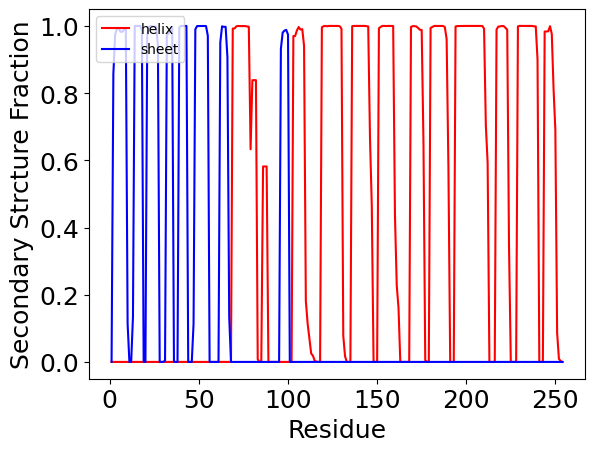

In [17]:
dssp=md.compute_dssp(trj,simplified=True) #one binary sheet or not, one binary are you a helix or not

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspH[dsspH=='H']=1                                                                                      
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=0                                                                                      
 dsspH[dsspH=='NA']=0 
 dsspH=dsspH.astype(int) #convert to integers
 TotalH=np.sum(dsspH,axis=1)  # number of H in each frame (row)
 Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspE) #this sums down each column and divides by length, gives a vector that is the fraction of helices in each row. 

 dsspE[dsspE=='H']=0
 dsspE[dsspE=='E']=1
 dsspE[dsspE=='C']=0
 dsspE[dsspE=='NA']=0
 dsspE=dsspE.astype(int)
 TotalE=np.sum(dsspE,axis=1) 
 Eprop=np.sum(dsspE,axis=0).astype(float)/len(dsspE) 
 return Hprop, Eprop

Hprop,Eprop=dssp_convert(dssp)
plt.plot(residue_num,Hprop,c='r',label='helix')
plt.plot(residue_num,Eprop,c='b',label='sheet')

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)


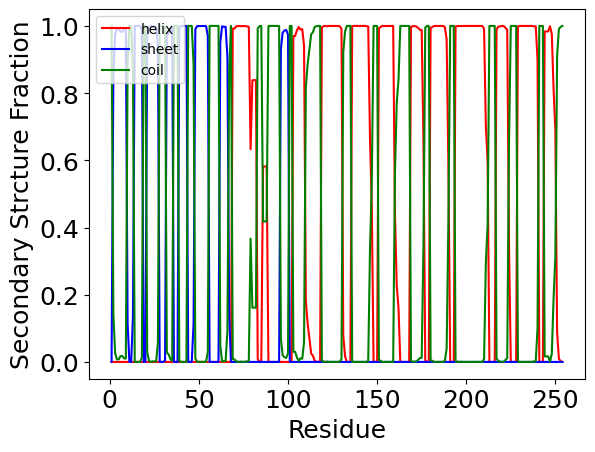

In [18]:
dssp=md.compute_dssp(trj,simplified=True) #one binary sheet or not, one binary are you a helix or not

def dssp_convert(dssp):
 dsspH=np.copy(dssp)
 dsspE=np.copy(dssp)
 dsspC=np.copy(dssp)
 dsspH[dsspH=='H']=1                                                                                      
 dsspH[dsspH=='E']=0                                                                                      
 dsspH[dsspH=='C']=0                                                                                      
 dsspH[dsspH=='NA']=0 
 dsspH=dsspH.astype(int) #convert to integers
 TotalH=np.sum(dsspH,axis=1)  # number of H in each frame (row)
 Hprop=np.sum(dsspH,axis=0).astype(float)/len(dsspE) #this sums down each column and divides by length, gives a vector that is the fraction of helices in each row. 

 dsspE[dsspE=='H']=0
 dsspE[dsspE=='E']=1
 dsspE[dsspE=='C']=0
 dsspE[dsspE=='NA']=0
 dsspE=dsspE.astype(int)
 TotalE=np.sum(dsspE,axis=1) 
 Eprop=np.sum(dsspE,axis=0).astype(float)/len(dsspE) 
    
 dsspC[dsspC=='H']=0
 dsspC[dsspC=='E']=0
 dsspC[dsspC=='C']=1
 dsspC[dsspC=='NA']=0
 dsspC=dsspC.astype(int)
 TotalC=np.sum(dsspC,axis=1) 
 Cprop=np.sum(dsspC,axis=0).astype(float)/len(dsspC) 
 return Hprop, Eprop, Cprop

Hprop,Eprop,Cprop=dssp_convert(dssp)
plt.plot(residue_num,Hprop,c='r',label='helix')
plt.plot(residue_num,Eprop,c='b',label='sheet')
plt.plot(residue_num,Cprop,c='g',label='coil')
plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)


In [19]:
#Plot just 'T' turn population
dsspT=np.copy(dssp_full)
dsspT[dsspT!='T']=0
dsspT[dsspT=='T']=1
dsspT=dsspT.astype(int)
TotalT=np.sum(dsspT,axis=1)
#calculate the column-wise mean by adding elements in each column and dividing by the number of frames
Tprop=np.sum(dsspT,axis=0).astype(float)/len(dsspT)
#plot the population of 3-Helix
plt.plot(residue_num,Tprop,c='r',label='Turn')
plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Structure Fraction', size=18)
plt.tick_params(labelsize=18)

NameError: name 'dssp_full' is not defined

***HOMEWORK Problem 1***

**Use the full DSSP set of secondary structure assignments to plot the population of another secondary structure type and visualize it with a representative frame or frames in VMD**

**Consult the original DSSP paper (or online documentaiton) to confirm the criteria for this assignment** 

Kabsch W, Sander C (1983). “Dictionary of protein secondary structure: pattern recognition of hydrogen-bonded and geometrical features”. Biopolymers 22 (12): 2577-637. doi:10.1002/bip.360221211

dssp=md.compute_dssp(trj,simplified=False)

https://mdtraj.org/1.9.4/api/generated/mdtraj.compute_dssp.html

The DSSP assignment codes are:

‘H’ : Alpha helix

‘B’ : Residue in isolated beta-bridge

‘E’ : Extended strand, participates in beta ladder

‘G’ : 3-helix (3/10 helix)

‘I’ : 5 helix (pi helix)

‘T’ : hydrogen bonded turn

‘S’ : bend

‘ ‘ : Loops and irregular elements

The simplified DSSP codes are:

‘H’ : Helix. Either of the ‘H’, ‘G’, or ‘I’ codes.

‘E’ : Strand. Either of the ‘E’, or ‘B’ codes.

‘C’ : Coil. Either of the ‘T’, ‘S’ or ‘ ‘ codes.

SS: G []


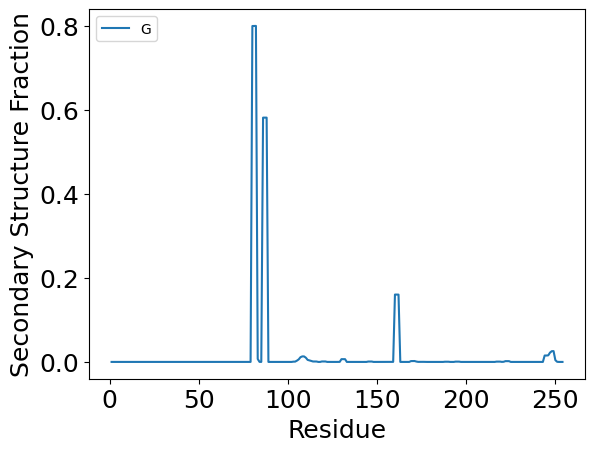

In [20]:
####HOMEWORK 1 Answer ######

#This code used the full DSSP set (indicated by simplified = false) and plots the probability of 'G' for each res. 
dssp_full = md.compute_dssp(trj, simplified=False)

def dssp_convert_type(dssp, stype):
    dsspS = np.copy(dssp)
    dsspS[dsspS != stype] = 0
    dsspS[dsspS == stype] = 1
    dsspS = dsspS.astype(int)
    TotalS = np.sum(dsspS, axis=1)
    Sprop = np.sum(dsspS, axis=0).astype(float) / len(dsspS)
    return Sprop

# Choose the secondary structure type you want to plot
SS = 'G'  # For example, 'H' for helix

Tprop = dssp_convert_type(dssp_full, SS)
plt.plot(residue_num, Tprop, label=SS)

print("SS:", SS, np.asarray(residue_num)[np.where(Tprop > 0.90)])

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Structure Fraction', size=18)
plt.tick_params(labelsize=18)
#plt.xlim(242,400)

***Challenge Problem #1***

**Write function/efficient loop to calculate all secondary structure populations from the dssp_full definitions 
and write out all residues numbers with > 90% of each seondary structure type**

SS: H [ 68  69  70  71  72  73  74  75  76  77 102 103 104 105 106 107 108 118
 119 120 121 122 123 124 125 126 127 128 129 135 136 137 138 139 140 141
 142 143 144 150 151 152 153 154 155 156 157 158 168 169 170 171 172 173
 174 179 180 181 182 183 184 185 186 187 188 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 216 217 218 219 220 221 222 228
 229 230 231 232 233 234 235 236 237 238 243 244 245 246 247]
SS: E [ 2  3  4  5  6  7  8 13 14 15 16 17 20 21 22 23 24 25 26 31 32 33 34 38
 39 40 41 42 47 48 49 50 51 52 53 54 61 62 63 64 65 95 96 97 98 99]
SS: I []
SS: G []
SS: B []
SS: T [ 27  28  44  45 130 131 176 190 224]
SS: S [ 10  11  18  19  36  37  56  57  58  94 147 164 226 240 241]
SS:   [  0  30  35  43  59  60  67  89  92  93 100 101 117 148 149 165 166 167
 178 191 192 212 213 215 225 242 251 252 253]


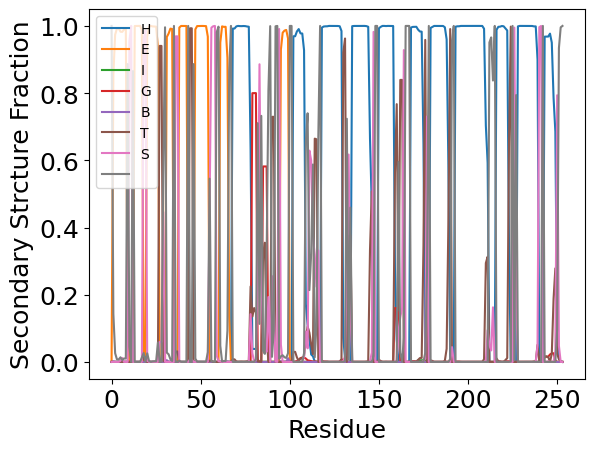

In [42]:
#### Challenge Problem Write a Function to Compute the Population of Any Secondary Structure Type
#### Write a loop to plot all populations
#### Write code to output the residue numbers of every residue with > 90% each SS type

dssp_full=md.compute_dssp(trj,simplified=False)

def dssp_convert_type(dssp,type):
 dsspS=np.copy(dssp)
 dsspS[dsspS!=type]=0                                                                                      
 dsspS[dsspS==type]=1   # you could do this with an if as well                                                                                   
 dsspS=dsspS.astype(int)
 TotalS=np.sum(dsspS,axis=1) 
 Sprop=np.sum(dsspS,axis=0).astype(float)/len(dsspS) 
 return Sprop

for t in ['H','E','I','G','B','T','S',' ']:
  Tprop=dssp_convert_type(dssp_full,t)
  plt.plot(residue_num,Tprop,label=t)
  print("SS:",t,np.asarray(residue_num)[np.where(Tprop>.90)])

plt.legend(loc="upper left")
plt.xlabel('Residue', size=18)
plt.ylabel('Secondary Strcture Fraction', size=18)
plt.tick_params(labelsize=18)


In [43]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md

# Compute DSSP for the trajectory
dssp_full = md.compute_dssp(trj, simplified=False)

def dssp_convert_type(dssp, type):
    dsspS = np.copy(dssp)
    dsspS[dsspS != type] = 0
    dsspS[dsspS == type] = 1
    dsspS = dsspS.astype(int)
    TotalS = np.sum(dsspS, axis=1)
    Sprop = np.sum(dsspS, axis=0).astype(float) / len(dsspS)
    return TotalS, Sprop

# Define the secondary structure types
secondary_structure_types = ['H', 'E', 'I', 'G', 'B', 'T', 'S', ' ']


for t in secondary_structure_types:
    TotalS, Tprop = dssp_convert_type(dssp_full, t)
    residues_within_range1 = np.where((Tprop >= 0.0) & (Tprop <= 0.2))[0]
    filtered_residue_num1 = np.asarray(residue_num)[residues_within_range1]
    filtered_Tprop1 = Tprop[residues_within_range1]
    print("Residues with population of", t, "between 0% and 20%:", np.asarray(residue_num)[residues_within_range1])


for t in secondary_structure_types:
    TotalS, Tprop = dssp_convert_type(dssp_full, t)
    residues_within_range2 = np.where((Tprop >= 0.8) & (Tprop <= 1.0))[0]
    filtered_residue_num2 = np.asarray(residue_num)[residues_within_range2]
    filtered_Tprop2 = Tprop[residues_within_range2]
    print("Residues with population of", t, "between 80% and 100%:", np.asarray(residue_num)[residues_within_range2])


Residues with population of H between 0% and 20%: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 109 110 111 112 113 114 115 116 117 130 131 132 133 134 147 148 149
 160 161 162 163 164 165 166 167 176 177 178 190 191 192 212 213 214 215
 224 225 226 227 240 241 242 250 251 252 253]
Residues with population of E between 0% and 20%: [  0   9  10  11  12  18  19  27  28  29  30  35  36  37  43  44  45  46
  55  56  57  58  59  60  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 13

In [29]:
#find out what index numbers correspond to residues of interest
index_number = np.where(residue_id == 111)[0]
print("Index number of value 445:", index_number)
index_number2 = np.where(residue_id == 116)[0]
print("Index number of value 446:", index_number2)
index_number3 = np.where(residue_id == 78)[0]
print("Index number of value 447:", index_number3)

Index number of value 445: [110]
Index number of value 446: [115]
Index number of value 447: [77]


In [286]:
#find frames corresponding to H or T for those 3 residues
import numpy as np

residue_numbers = [111, 204, 205]

for residue_number in residue_numbers:
    array_index = residue_number - 0
    print("Residue Number:", np.asarray(residue_id)[array_index])
    
    if array_index is not None:
        # Search for turn ('H') frames and select every 5th frame
        helix_frames = np.where(dssp_full[::5, array_index] == 'H')[0] * 5
        print("Frames where residue", residue_number, "is assigned as helix ('H'):", helix_frames)
        
        # Search for turn ('T') frames
        turn_frames = np.where(dssp_full[::5, array_index] == 'T')[0] * 5
        print("Frames where residue", residue_number, "is assigned as turn ('T'):", turn_frames)
    else:
        print("No Frames at those SS", residue_number)

Residue Number: 445
Frames where residue 203 is assigned as helix ('H'): [  10   20   25   30   35   40   45   50   60   65   70   75   80   85
   90   95  100  105  110  115  120  125  130  135  140  145  150  155
  160  165  170  175  180  185  195  210  215  220  225  230  240  245
  250  255  260  265  275  280  285  290  295  305  310  315  320  330
  335  340  345  350  355  360  365  370  375  380  385  390  405  425
  455  460  470  490  495  500  505  510  655  685  735  780  785  790
  815  820  825  830  840  845  930  945  970  975  990 1030 1060 1070
 1095 1155 1160 1165 1170 1175 1260 1265 1270 1275 1280 1285 1290 1295
 1315 1320 1330 1340 1380 1390 1430 1495 1540 1665 1675 1685 1690 1695
 1700 1705 1710 1715 1720 1725 1730 1735 1740 1745 1750 1755 1760 1770
 1815 1830 1835 1840 1845 1850 1855 1860 1870 1875 1880 1885 1890 1895
 1900 1905 1910 1915 1920 1925 1930 1935 1940 1950 1955 1960 1965 1970
 1980 1985 1995 2000 2005 2010 2015 2025 2030 2035 2040 2045 2050 2055
 206

In [44]:
#these are the functions of MD to spit out all the phi, psi, and chi values in arrays that tell you the index of the residues and what the values are
indices_phi, phis = md.compute_phi(trj)
indices_psi, psis = md.compute_psi(trj)
indices_chi1, chi1s = md.compute_chi1(trj)
indices_chi2, chi2s = md.compute_chi2(trj)

In [45]:
np.shape(phis[:,0])

(30000,)

In [46]:
np.shape(indices_phi) #atoms used to calculate phi (251)

(253, 4)

In [47]:
indices_phi

array([[  14,   16,   18,   31],
       [  31,   33,   35,   50],
       [  50,   52,   54,   66],
       ...,
       [4137, 4139, 4141, 4159],
       [4159, 4161, 4163, 4181],
       [4181, 4183, 4185, 4198]])

In [48]:
phis[0]

array([-2.6944356 , -2.351752  , -2.3935912 , -2.391956  , -2.21689   ,
        1.3149091 , -1.392453  , -1.5937436 , -1.2986948 , -1.1941502 ,
       -2.2707195 , -1.2247951 , -1.9225065 , -1.5412139 , -1.6428771 ,
       -2.0189133 , -1.7452615 , -1.8624011 , -1.7812374 , -2.7033179 ,
       -2.3400383 , -2.1172493 , -1.9203416 , -1.4804003 , -2.2848012 ,
       -1.5225539 , -1.1918217 , -1.0984893 ,  1.6364422 , -1.1214969 ,
       -2.0962815 , -2.2824578 , -1.9417534 , -2.2809706 , -1.3908297 ,
       -0.84099066,  1.1149758 , -1.8121583 , -1.843424  , -2.608548  ,
       -2.3918116 , -2.414563  , -0.96402407, -0.8187223 ,  1.2793545 ,
       -1.1482635 , -2.245282  , -2.6522677 , -1.8375258 , -2.1400921 ,
       -1.7476536 , -2.151542  , -1.5920353 , -1.3232222 , -1.9009012 ,
       -2.5727026 , -1.8551276 , -1.3297819 , -0.92179924, -1.2977095 ,
       -2.7941937 , -2.290317  , -2.450795  , -2.2062898 , -1.984238  ,
       -1.6190288 , -1.3405839 , -0.7703182 , -0.8978983 , -1.31

In [49]:
phi_dict={} # empty, leaves places to store these new values, so that you don't have to keep track of where things are indexes, helpful for phis and psis
dihedral_dict = { 'phi': { },
          'psi': { },
          'chi1': { },
          'chi2': { }}

for i in range(0,len(indices_phi)): #goes over phi, pulls out indices, takes the atoms, get the resnum, and put in your dict the phi values, and put in dictionary
  indices=indices_phi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['phi'][resnum]=phis[:,i]

for i in range(0,len(indices_psi)):#' ' 
  indices=indices_psi[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['psi'][resnum]=psis[:,i]

for i in range(0,len(indices_chi1)):
  indices=indices_chi1[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi1'][resnum]=chi1s[:,i]

for i in range(0,len(indices_chi2)):
  indices=indices_chi2[i]
  atom=top.atom(indices[1])
  resnum=top.atom(indices[1]).residue.resSeq
  dihedral_dict['chi2'][resnum]=chi2s[:,i]
    

In [50]:
sequence

' [ASN1, MET2, LEU3, VAL4, LEU5, LYS6, LYS7, ILE8, ARG9, PHE10, TYR11, ASN12, CYS13, ALA14, ILE15, ILE16, HIS17, LEU18, ARG19, ASP20, ALA21, GLN22, LEU23, LEU24, ILE25, ARG26, THR27, LYS28, ASP29, GLY30, GLN31, THR32, LEU33, ASN34, ILE35, PRO36, PRO37, GLU38, SER39, LEU40, CYS41, TYR42, VAL43, GLU44, LYS45, ASN46, THR47, VAL48, MET49, ASP50, VAL51, ALA52, LEU53, LYS54, VAL55, LEU56, GLY57, SER58, GLY59, VAL60, PRO61, TYR62, GLU63, VAL64, TYR65, HIS66, VAL67, ASP68, SER69, ASP70, VAL71, LEU72, ARG73, CYS74, ILE75, CYS76, LYS77, VAL78, MET79, GLU80, PRO81, LEU82, LEU83, LEU84, ASP85, PRO86, GLN87, ARG88, VAL89, ASN90, HIS91, THR92, ARG93, ARG94, LYS95, ILE96, PHE97, THR98, CYS99, ALA100, VAL101, ASP102, GLU103, THR104, ASP105, THR106, ARG107, ILE108, PHE109, LYS110, ARG111, LEU112, THR113, GLY114, SER115, ASN116, VAL117, PRO118, GLN119, HIS120, ARG121, LEU122, VAL123, TYR124, LYS125, ILE126, THR127, TYR128, LEU129, LEU130, SER131, LYS132, VAL133, ASN134, ASP135, ILE136, GLU137, SER138, L

In [51]:
#Heres a function to plot a phi/psi ramachandran plot:

def plot_phipsi(res):
 plt.hist2d(dihedral_dict['phi'][res],dihedral_dict['psi'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.tick_params(labelsize=18)
 plt.show()
 return

def plot_chi(res):
    if res in dihedral_dict['chi1']:
     plt.hist(dihedral_dict['chi1'][res],bins=36,range=[-3.14,3.14])        
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('counts', size=18)
     plt.tick_params(labelsize=18)
     plt.show()
     plt.clf()   
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
    return



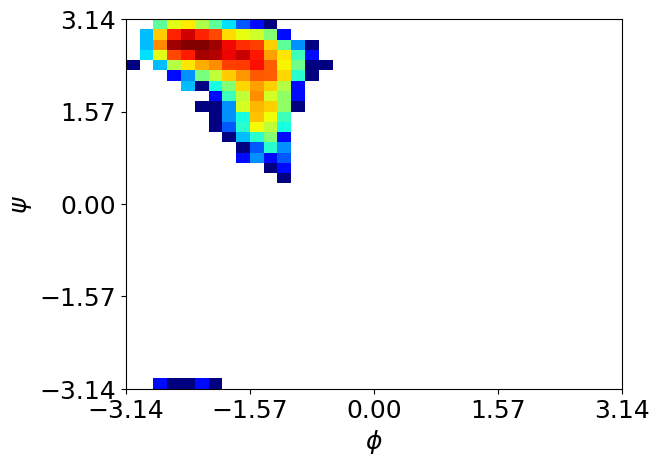

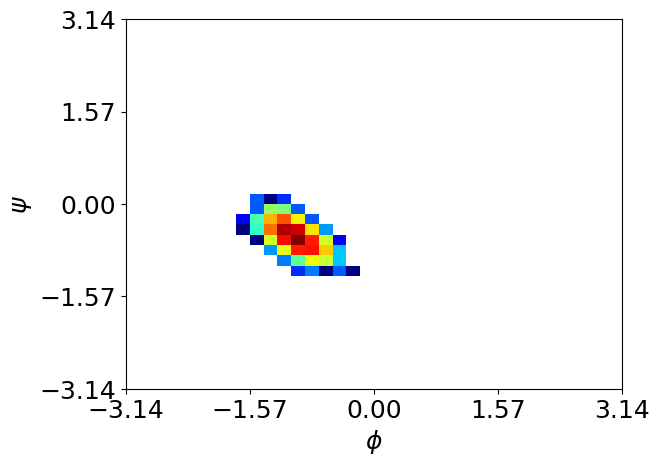

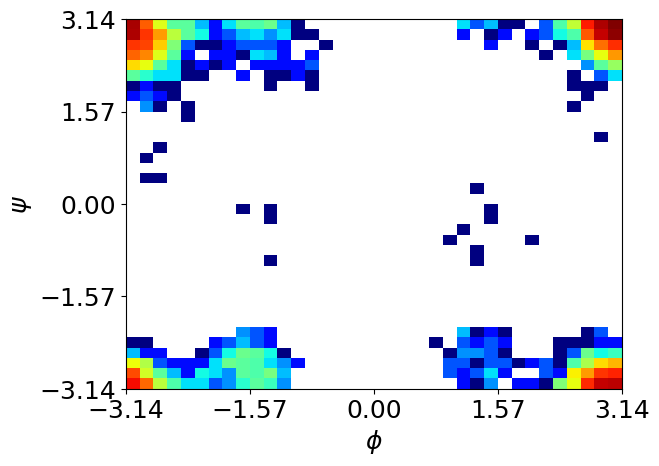

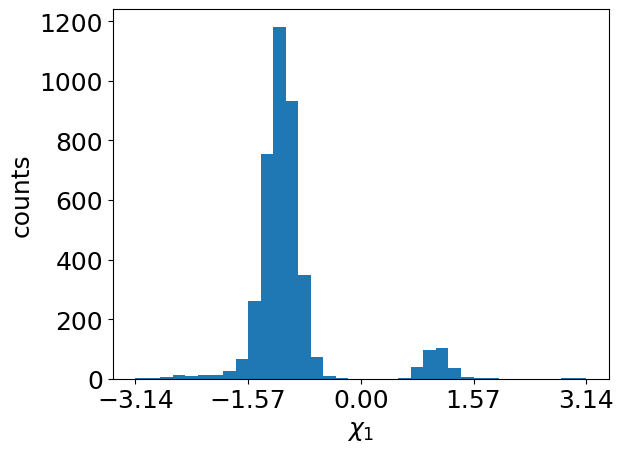

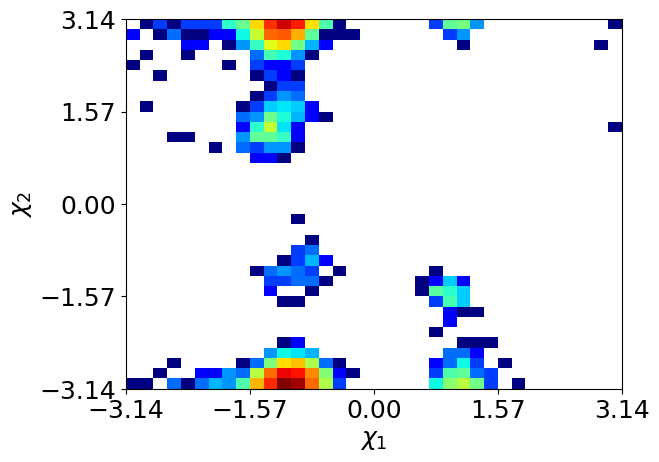

In [254]:
#nice function to plot phispi and plot chi
plot_phipsi() #this is a beta sheet
plot_phipsi(408) #this is proline
plot_phipsi(250) #this would be a glycine
plt.clf() #shows you rotomers
plot_chi(308) #shows where dominate and minor rotomers are

In [52]:
#Lets Visualize Some Rotamers

CA_sel=top.select('name CA')
resnames=[]
resnums=[]
for i in CA_sel:
 resnum=top.atom(i).residue.resSeq
 resnums.append(resnum)
 resname=top.atom(i).residue.name
 resnames.append(resname)

resnums=np.asarray(resnums)
resnames=np.asarray(resnames)
TYR_indices=np.where(resnames=='TYR')
TYR_resnums=resnums[TYR_indices]
TYR_resnums

array([ 11,  42,  62,  65, 124, 128, 141, 204, 226, 231])

Residue 11


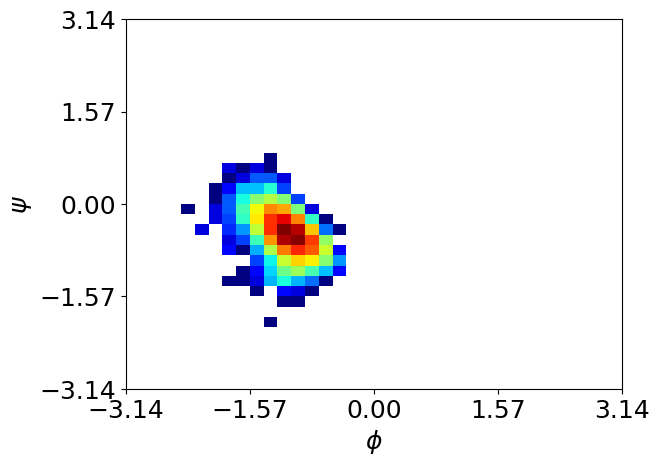

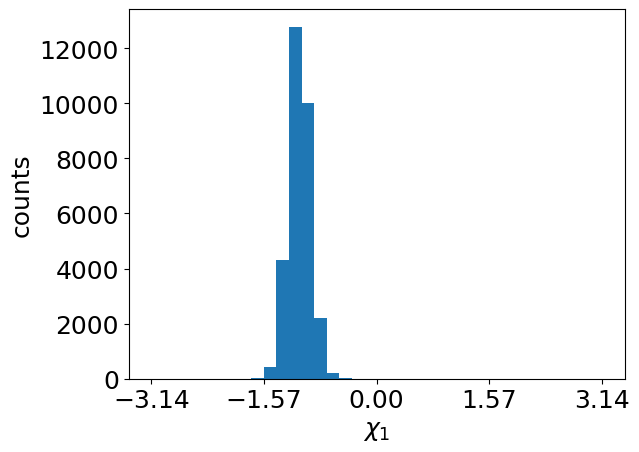

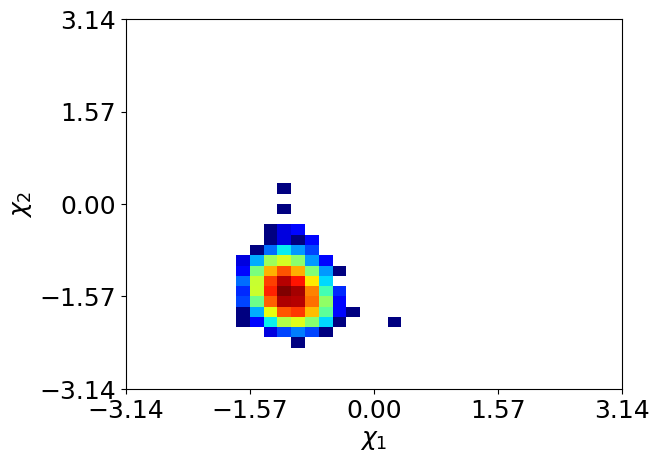

Residue 42


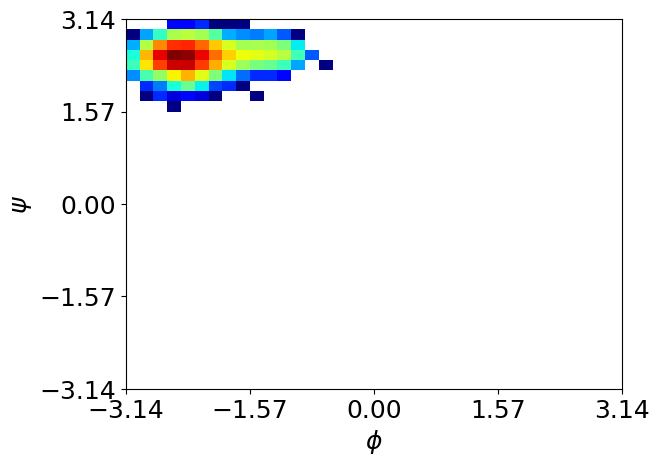

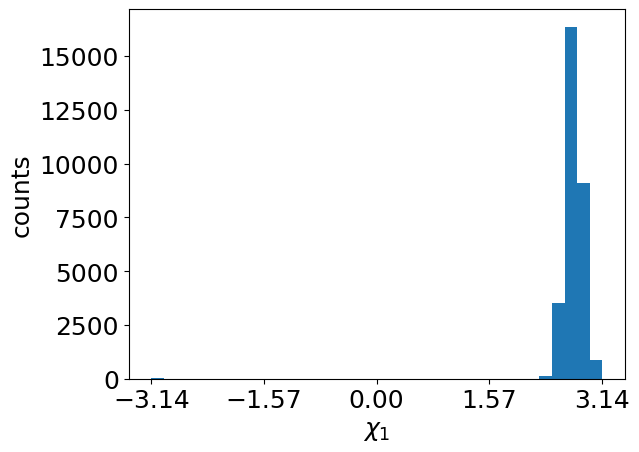

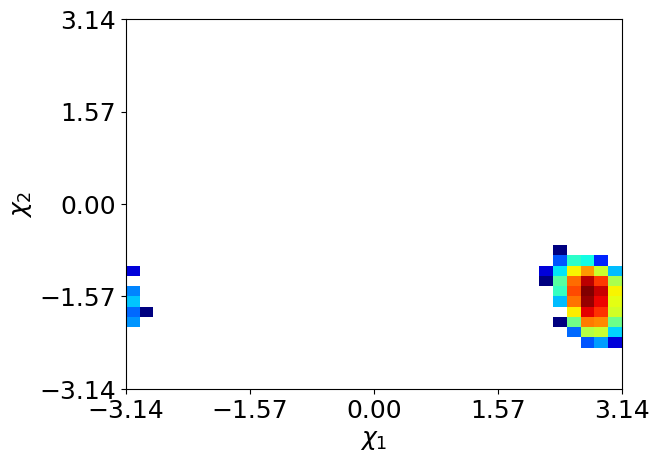

Residue 62


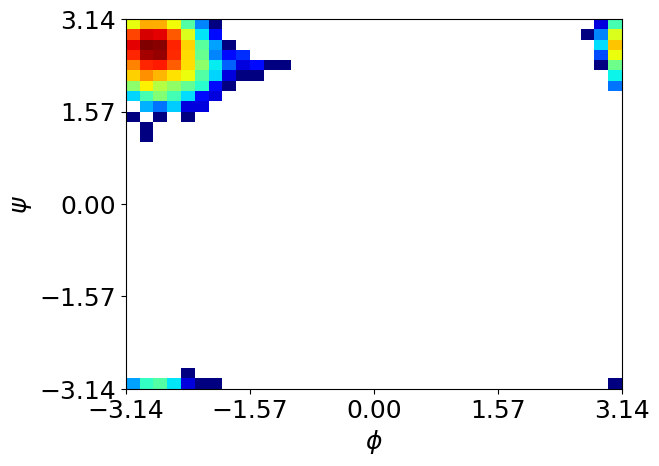

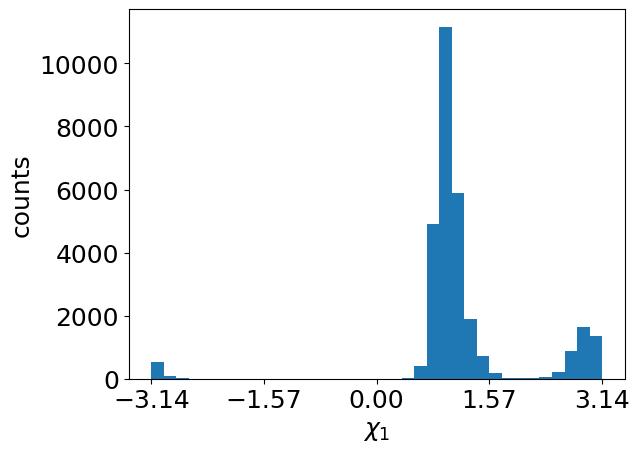

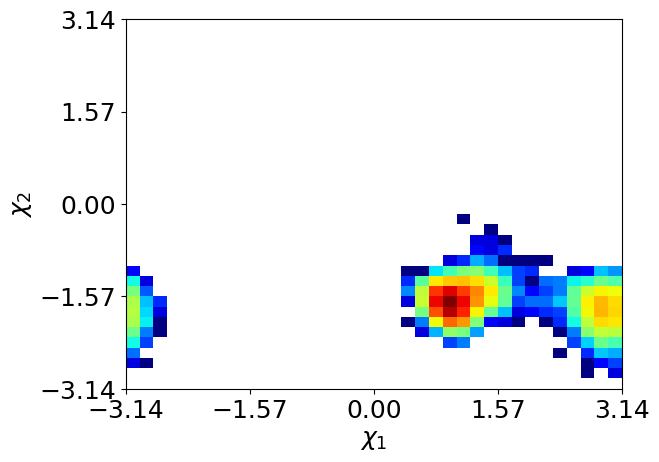

Residue 65


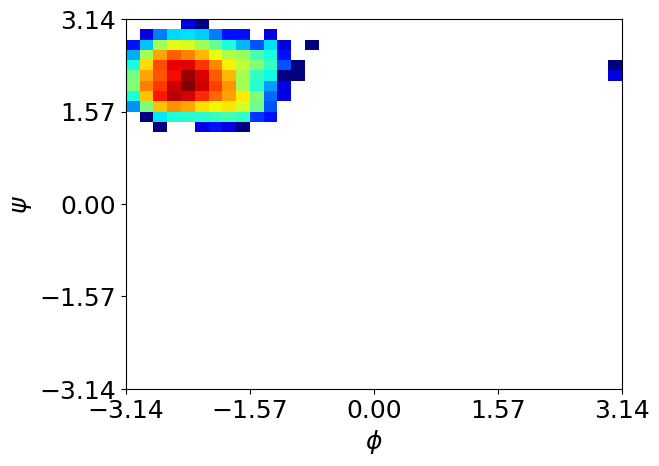

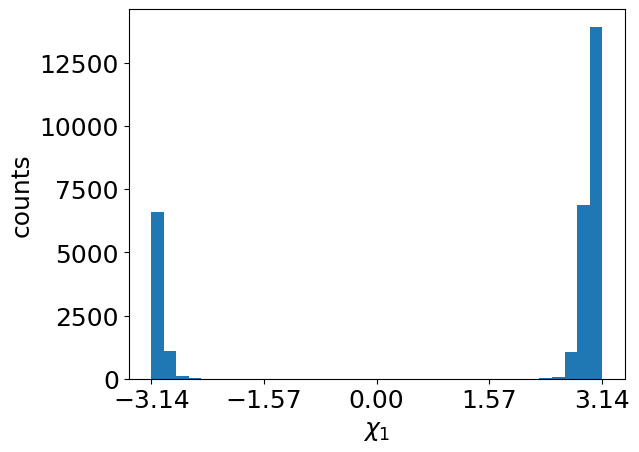

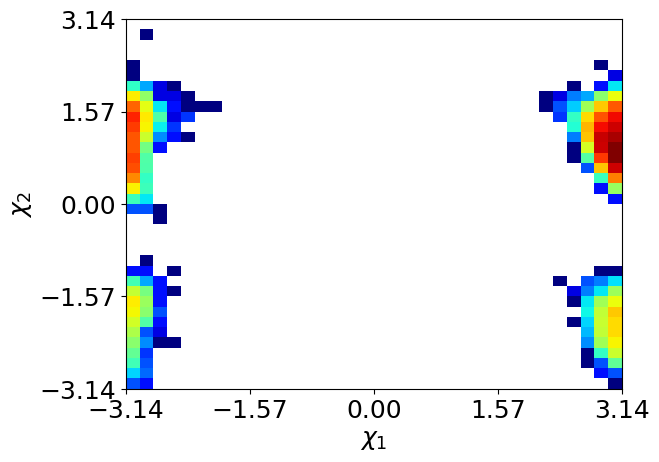

Residue 124


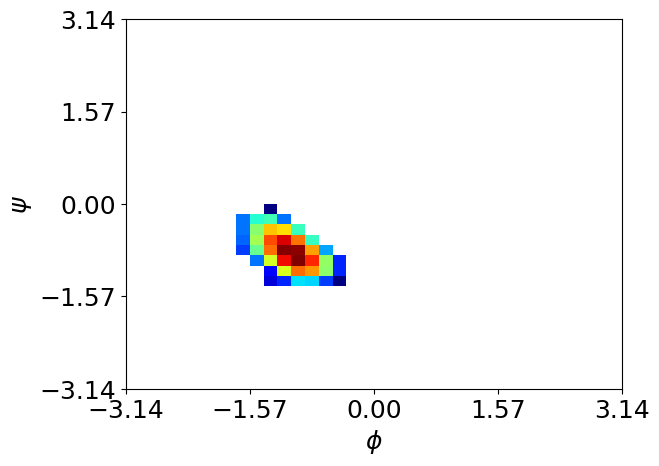

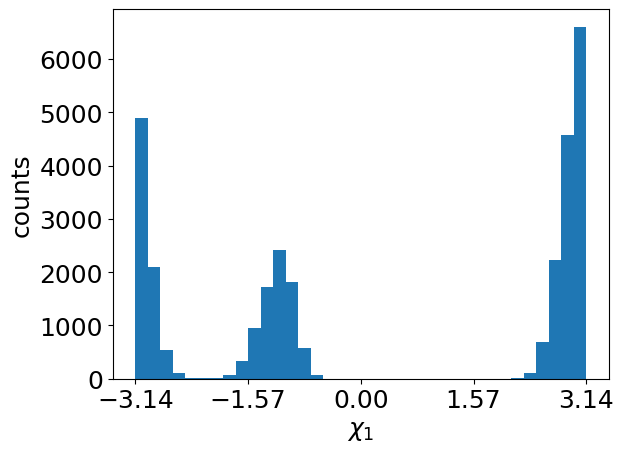

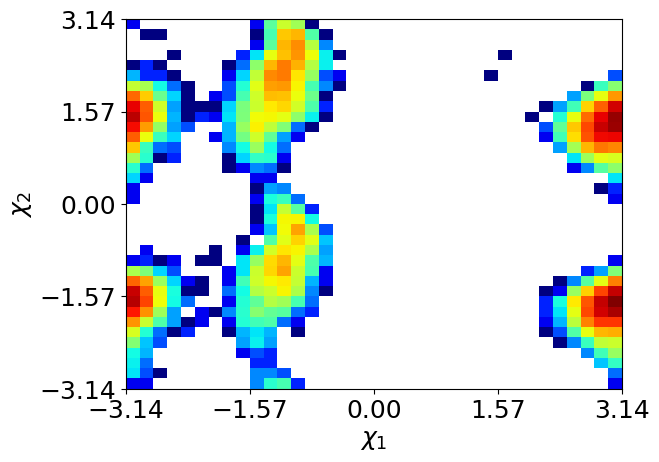

Residue 128


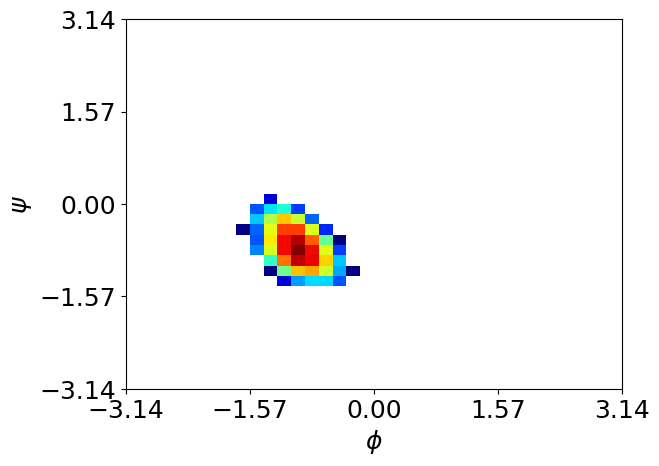

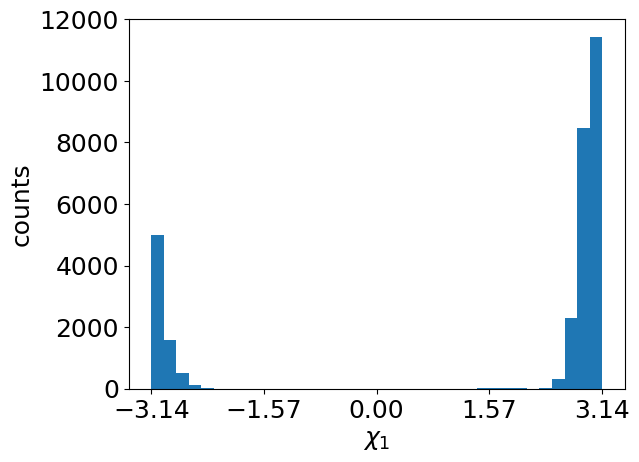

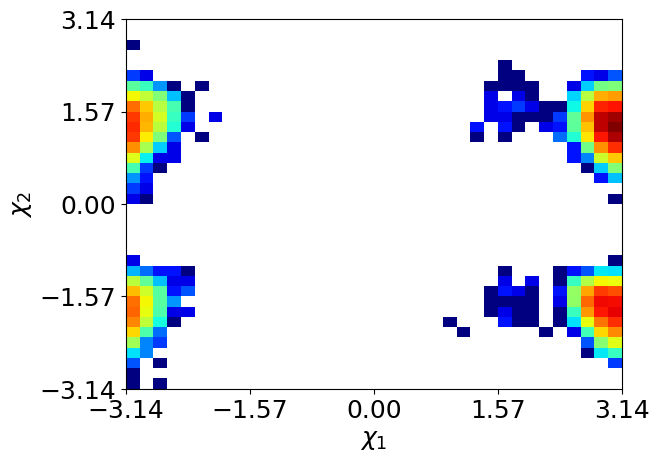

Residue 141


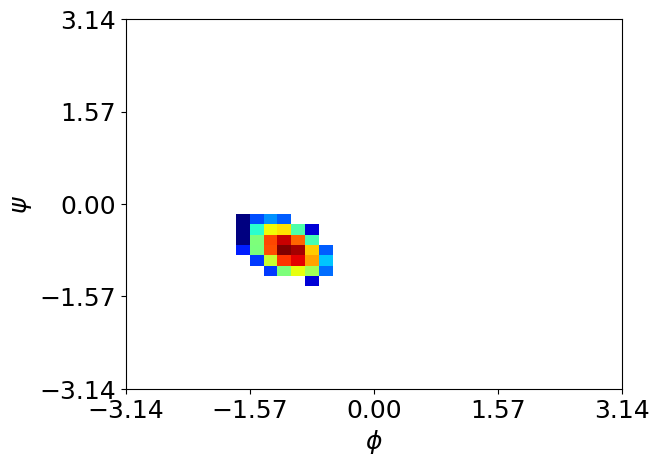

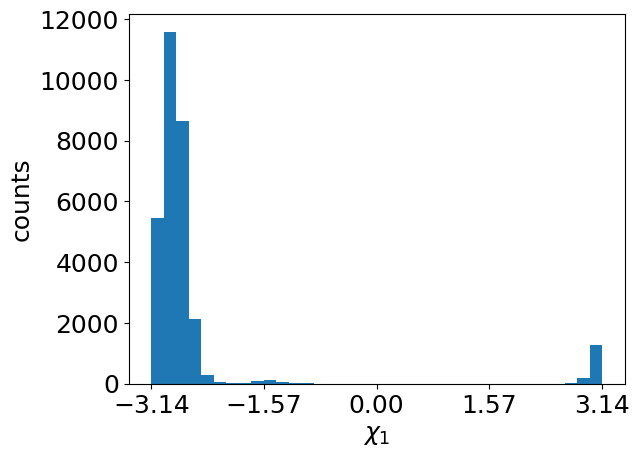

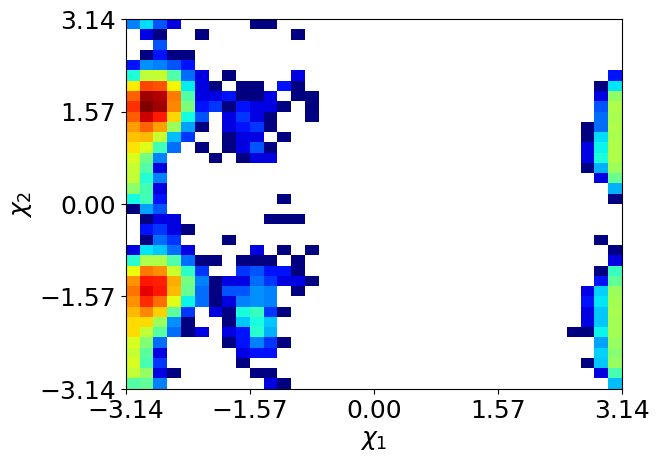

Residue 204


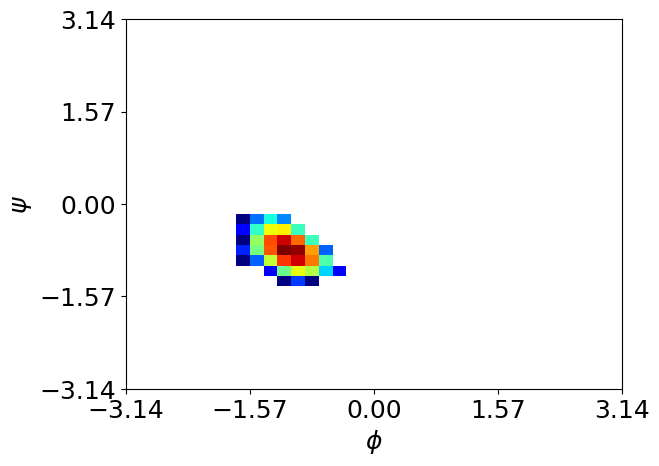

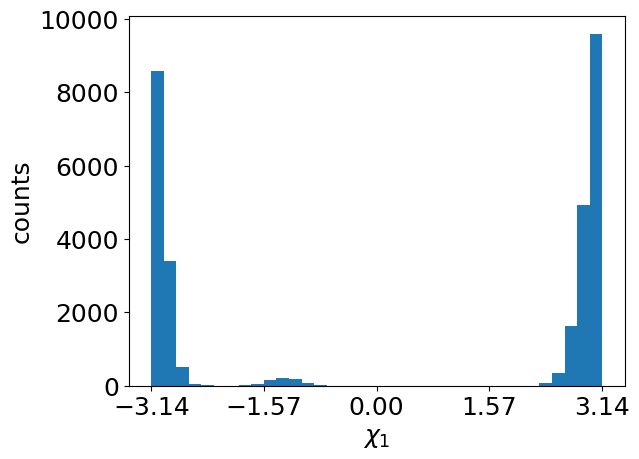

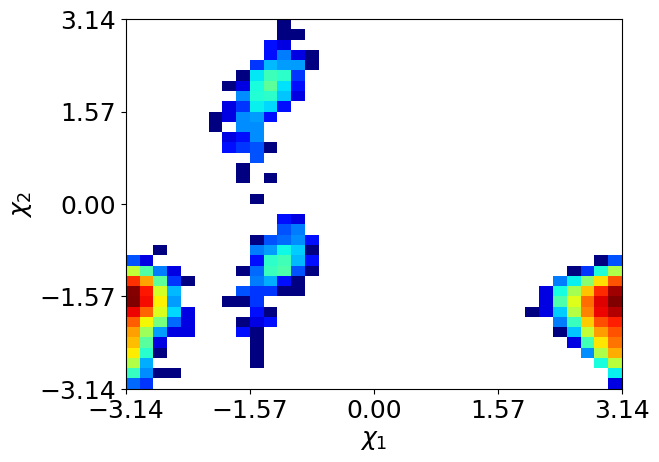

Residue 226


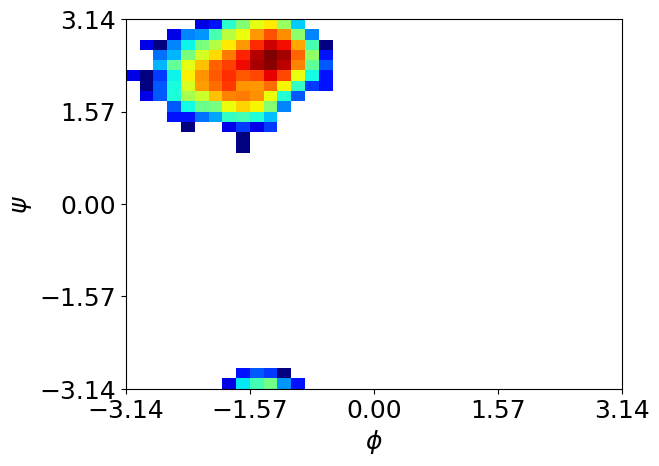

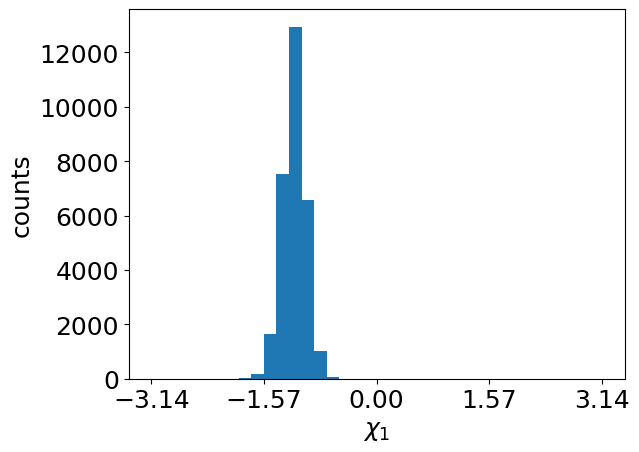

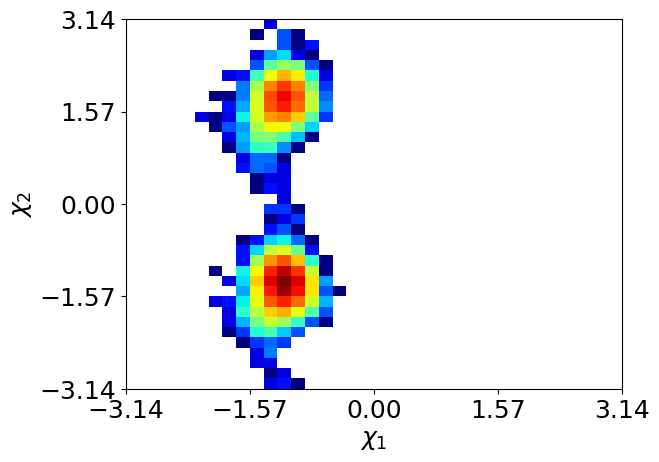

Residue 231


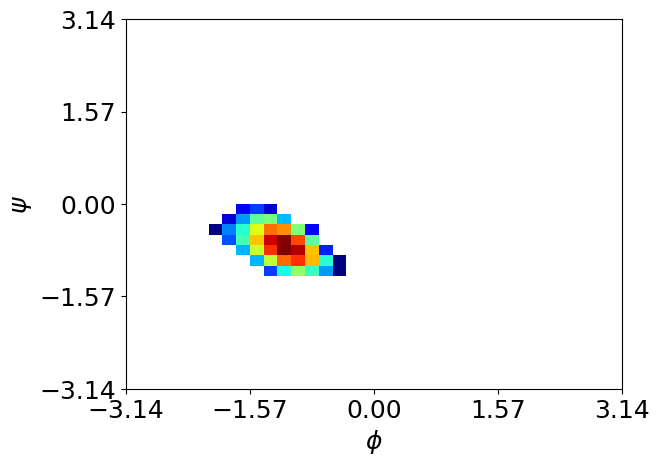

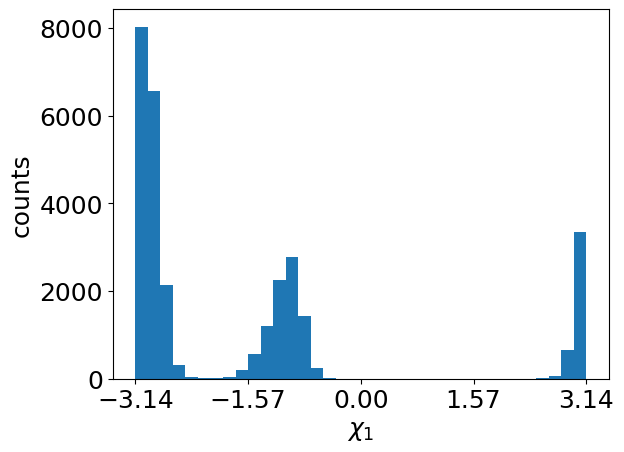

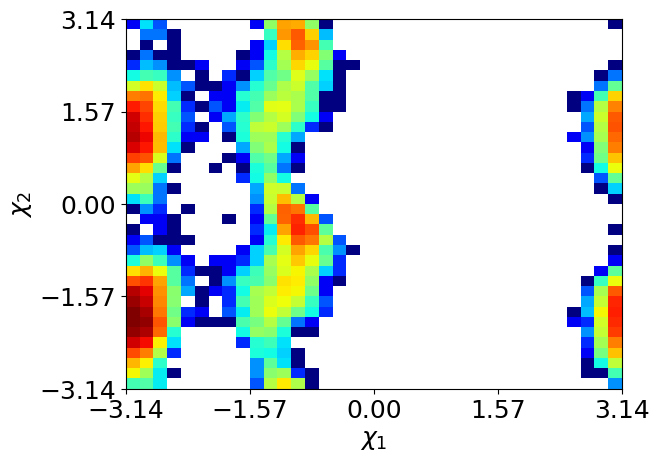

<Figure size 640x480 with 0 Axes>

In [53]:
for i in TYR_resnums:
    print("Residue",i)
    plot_phipsi(i)
    plt.clf()
    plot_chi(i)
    plt.clf()

In [56]:

CA_sel=top.select('name CA')
resnames=[]
resnums=[]
for i in CA_sel:
 resnum=top.atom(i).residue.resSeq
 resnums.append(resnum)
 resname=top.atom(i).residue.name
 resnames.append(resname)

resnums=np.asarray(resnums)
resnames=np.asarray(resnames)
HIS_indices=np.where(resnames=='HIS')
HIS_resnums=resnums[HIS_indices]
HIS_resnums

array([ 17,  66,  91, 120, 177, 205, 216])

Residue 17


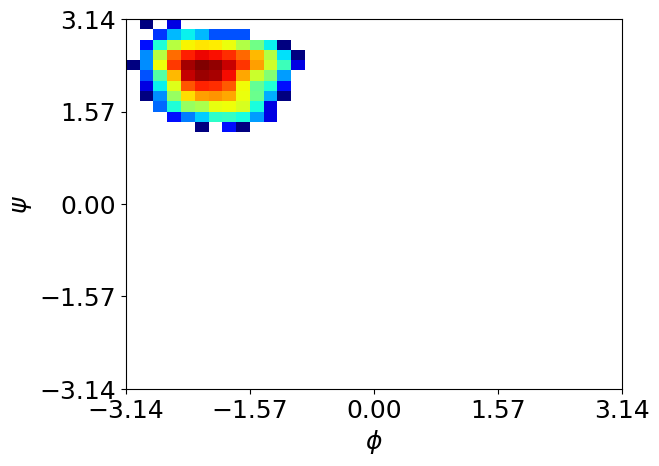

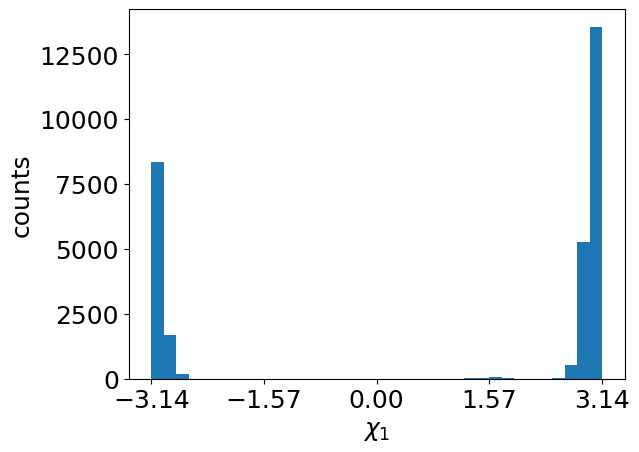

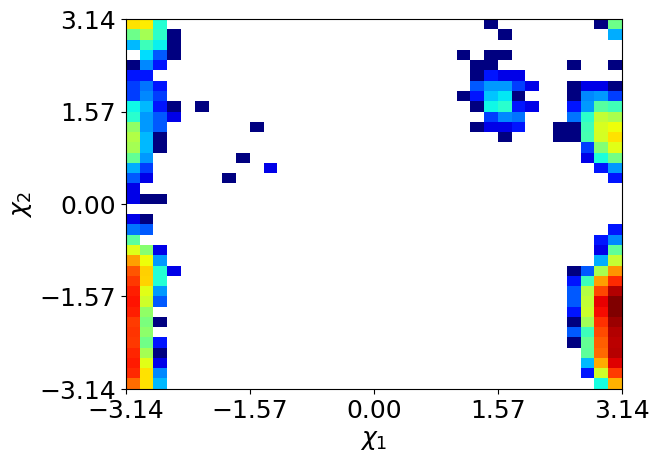

Residue 66


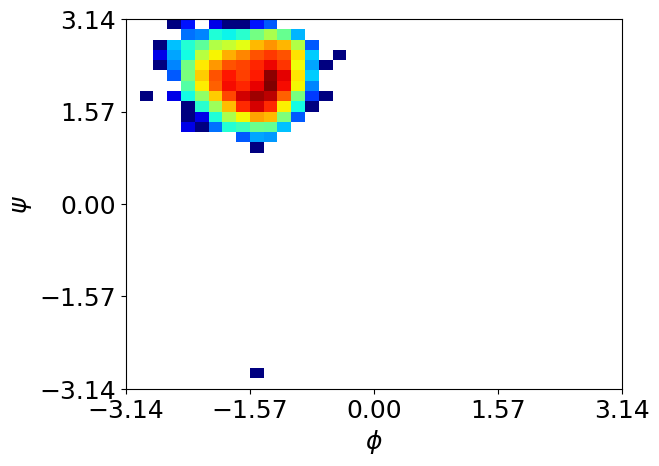

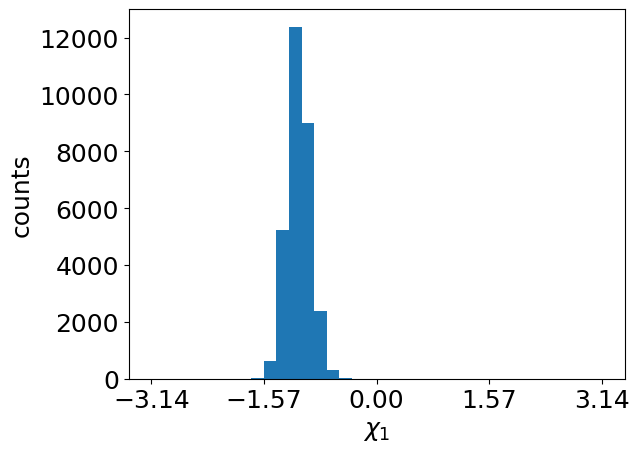

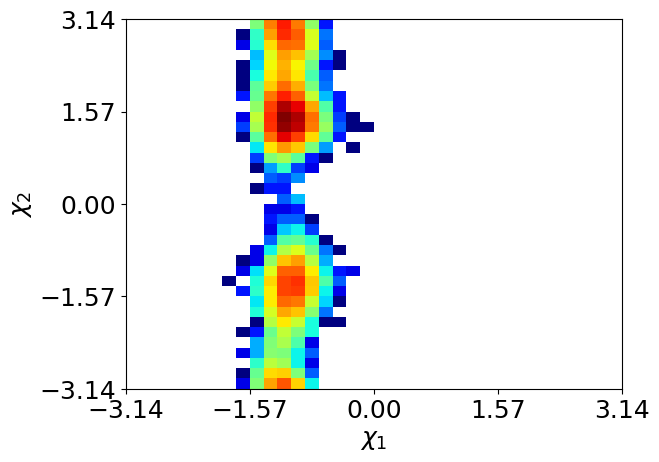

Residue 91


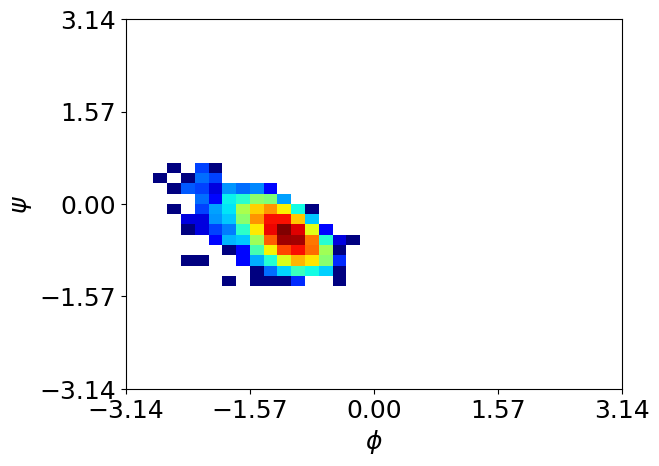

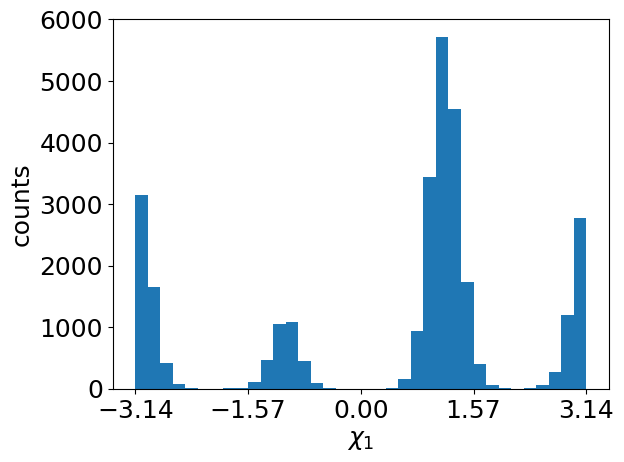

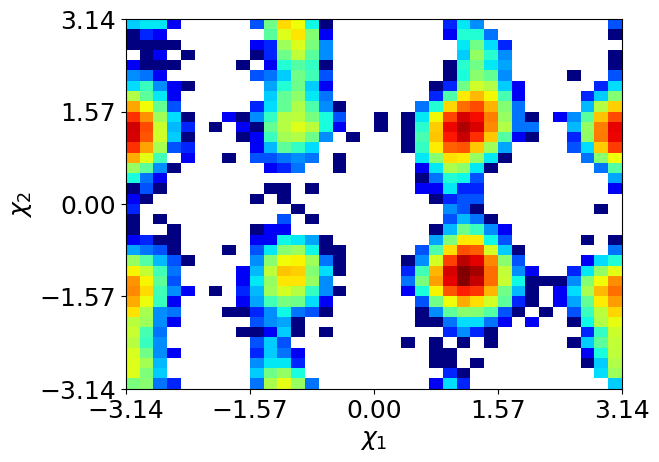

Residue 120


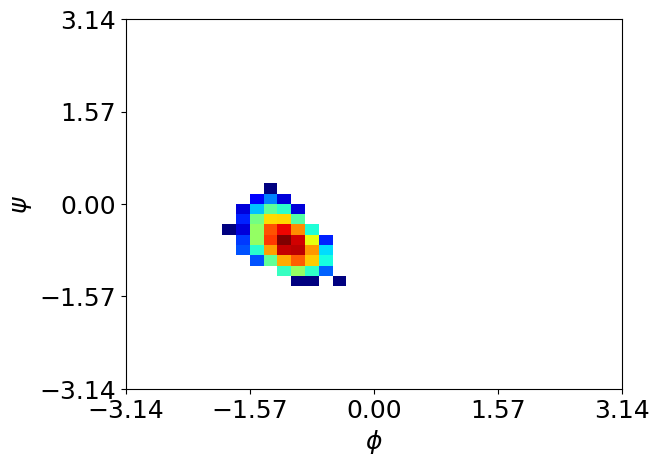

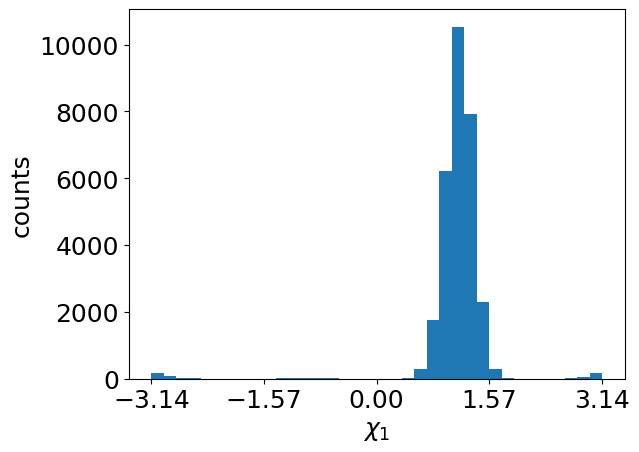

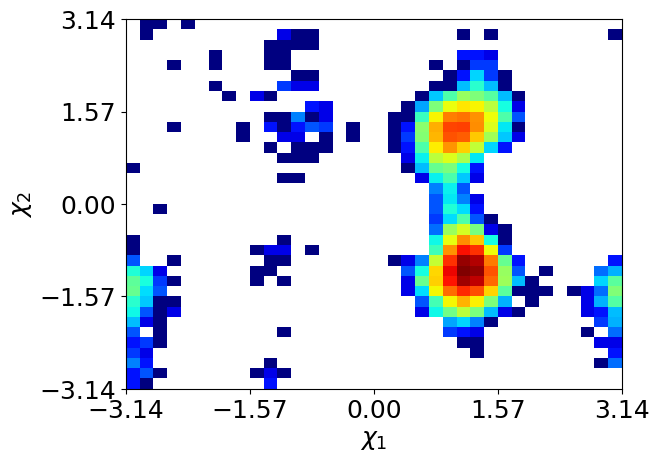

Residue 177


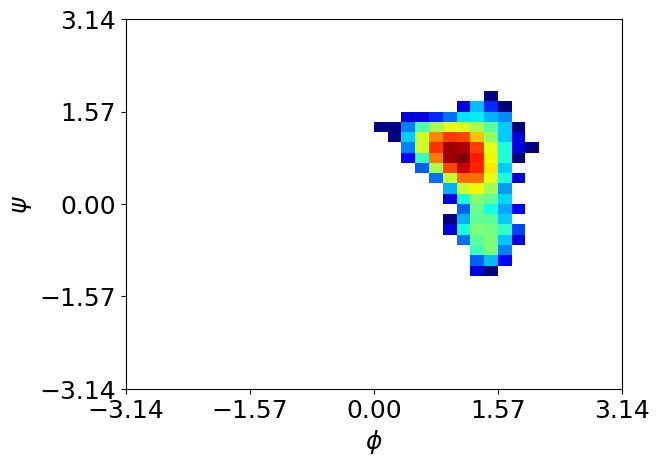

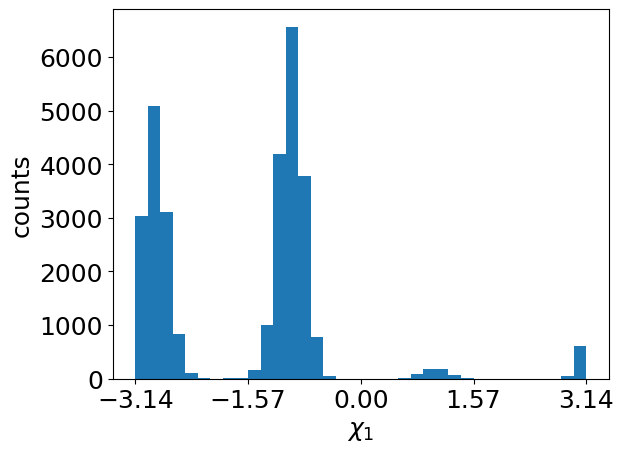

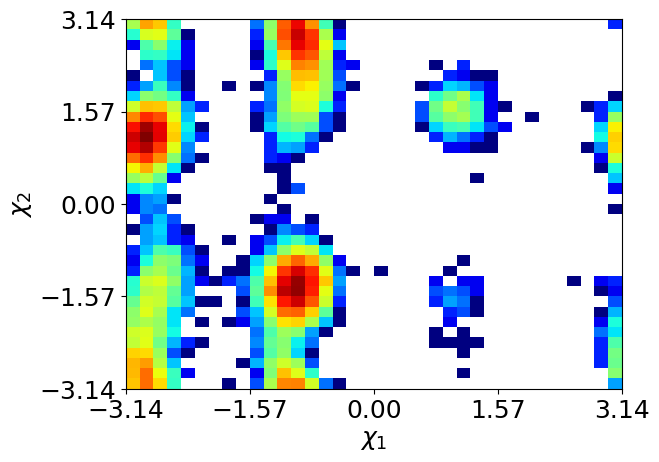

Residue 205


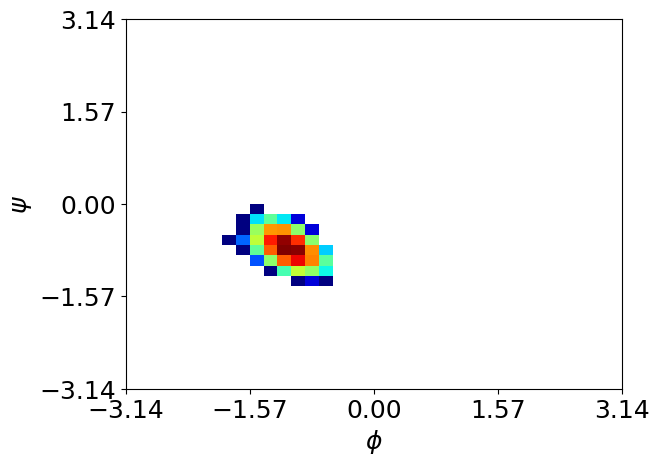

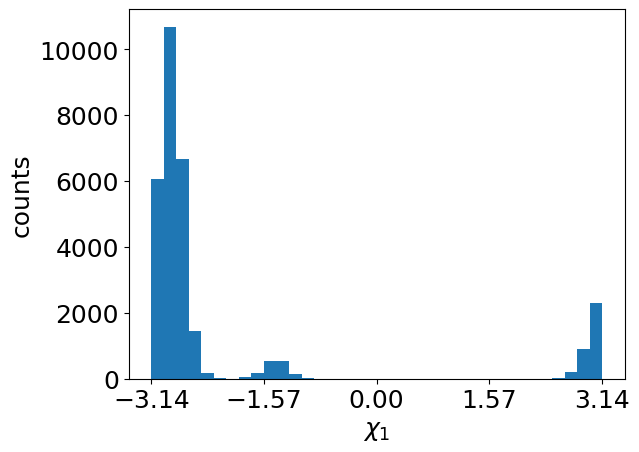

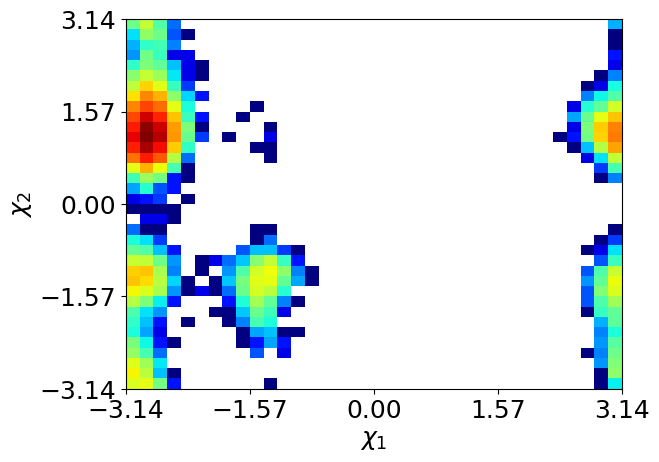

Residue 216


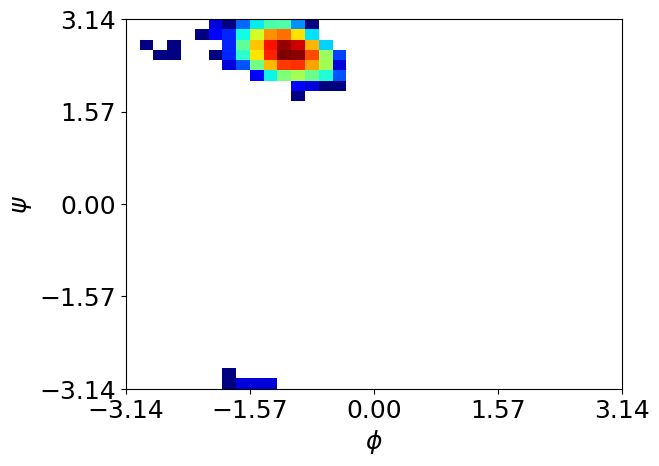

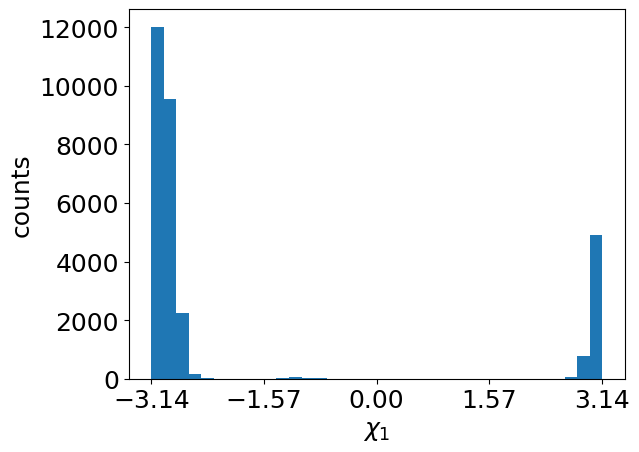

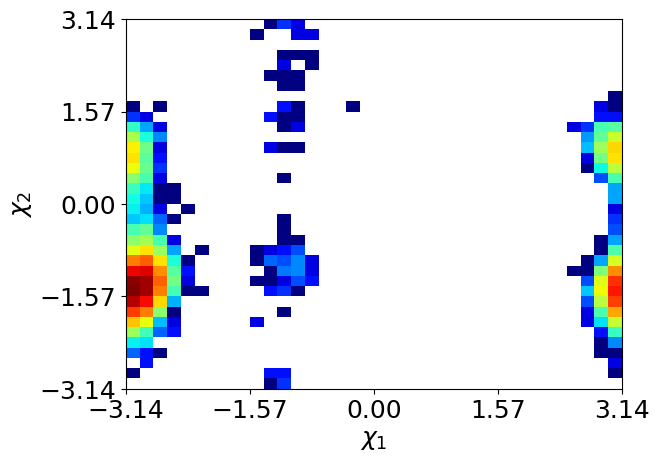

<Figure size 640x480 with 0 Axes>

In [57]:
for i in HIS_resnums:
    print("Residue",i)
    plot_phipsi(i)
    plt.clf()
    plot_chi(i)
    plt.clf()


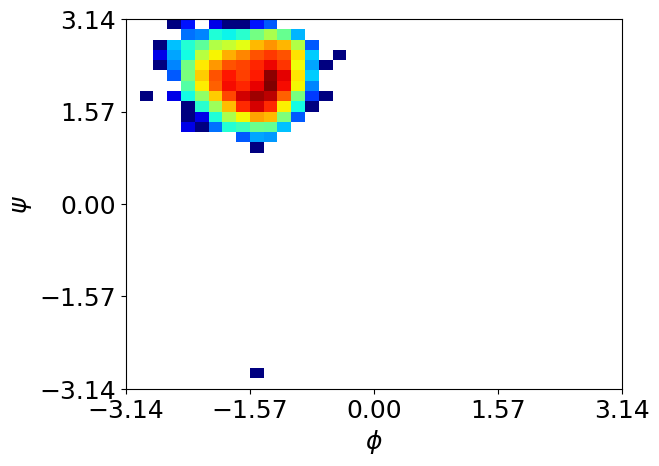

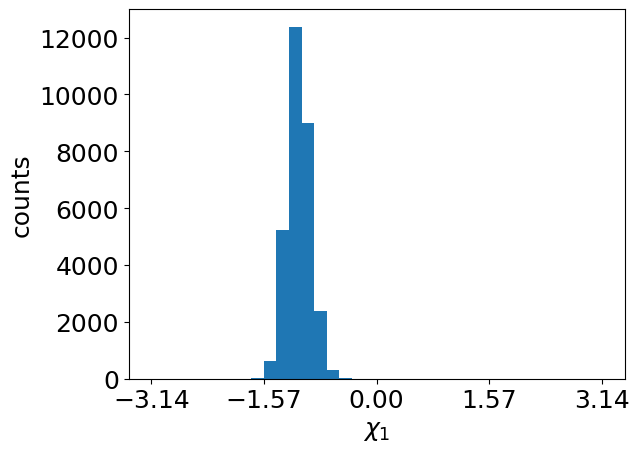

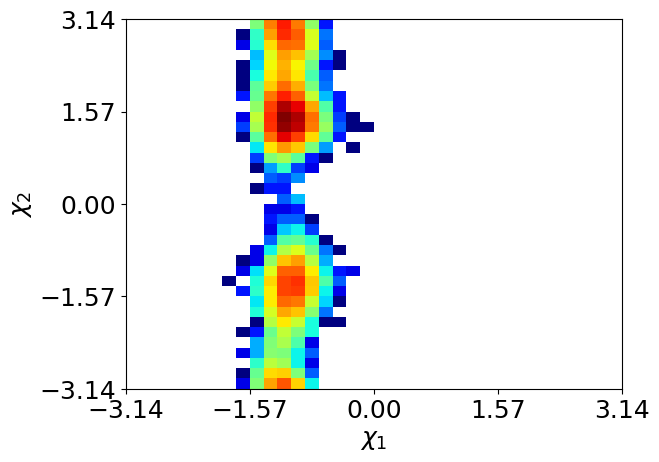

<Figure size 640x480 with 0 Axes>

In [58]:
#Decided to look at HIS 490 rotomers
plot_phipsi(66)
plt.clf()
plot_chi(66)
plt.clf()
#As you can see based on the multiple peaks on the Chi1 plot, this residue exists in mostly in 2 rotomers

In [61]:
#I would like to isolate out the frames where the X1 angle is between 0 and 1.57, between 0 and -1.57 to 
#between -1.57 and -3.14, and between 1.57 and 3.14 determine where HIS490 exists in those rotomers
import numpy as np

# Define the residue number of interest
resnum = 5

# Extract chi1 values for the specified residue number
chi1_values = dihedral_dict['chi1'].get(resnum, None)

if chi1_values is not None:
    # Find frames where chi1 is greater than 0
    frames_with_chi1_1 = np.where((chi1_values < -1.57) & (chi1_values > -3.14))[0]
    frames_with_chi1_2 = np.where((chi1_values < 0) & (chi1_values > -1.57))[0]
    frames_with_chi1_3 = np.where((chi1_values > 0) & (chi1_values < 1.57))[0]
    frames_with_chi1_4 = np.where((chi1_values > 1.57) & (chi1_values < 3.14))[0]
    print("Frames where chi1 of residue", resnum, "is position 1", frames_with_chi1_1)
    print("Frames where chi1 of residue", resnum, "is position 2", frames_with_chi1_2)
    print("Frames where chi1 of residue", resnum, "is position 3", frames_with_chi1_3)
    print("Frames where chi1 of residue", resnum, "is position 4", frames_with_chi1_4)
else:
    print("No chi1 values found for residue", resnum)

Frames where chi1 of residue 5 is position 1 [  480   533   543   589   674   880  1152  1210  1235  1505  1513  2459
  2472  2473  2476  2477  2479  2489  2492  2510  2512  2521  2522  2529
  2534  2544  2594  2642  2985  3180  3254  3326  3361  3363  3561  3601
  3603  3630  3631  3991  3993  4075  4076  4077  4247  4427  4428  4431
  4433  4436  4437  4438  4439  4440  4442  4446  4450  4451  4453  4467
  4470  4522  4579  4580  4585  4586  4588  4589  4598  4602  4604  4609
  4612  4614  4615  4622  4624  4626  4627  4630  4631  4632  4633  4638
  4639  4642  4643  4644  4645  4647  4648  4649  4652  4653  4654  4655
  4657  4659  4662  4664  4665  4668  4670  4671  4674  4676  4677  4678
  4681  4682  4683  4684  4685  4687  4688  4693  4715  4716  4717  4718
  4719  4720  4722  4723  4724  4725  4726  4728  4729  4730  4732  4734
  4735  4736  4738  4739  4740  4742  4744  4745  4746  4747  4748  4749
  4968  5031  5060  5063  5304  5613  5944  5946  6104  6201  6428  6460
  6598

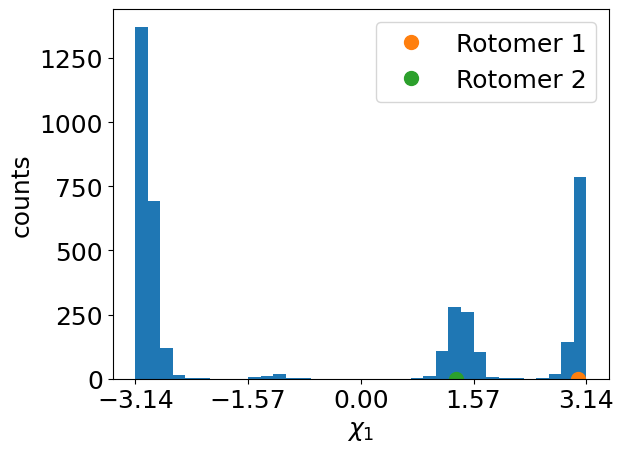

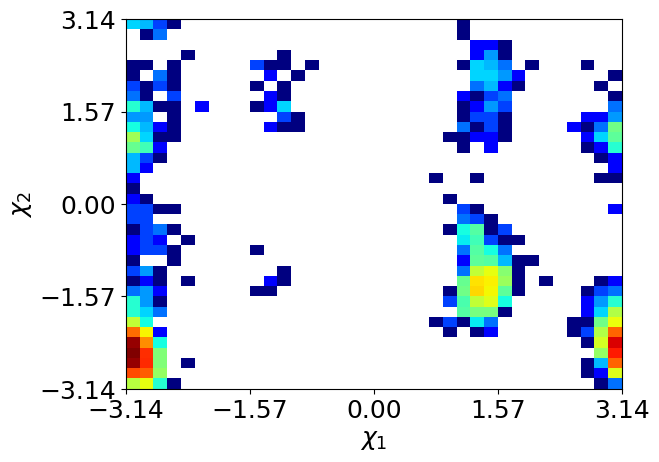

In [261]:
#Here is the plot of Chi1 (Chi2 as well if it existed for this residue) pulling out specific frames 
#frame 1469 where 'rotomer 1' exists and frame 1499 where 'rotomer 2' exists
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

def plot_chi(res, frames_to_highlight=None):
    if res in dihedral_dict['chi1']:
        plt.hist(dihedral_dict['chi1'][res], bins=36, range=[-3.14, 3.14])        
        plt.xticks([-3.14, -3.14/2, 0, 3.14/2, 3.14], fontsize=35)
        plt.xlabel('$\chi_1$', size=18)
        plt.ylabel('counts', size=18)
        plt.tick_params(labelsize=18)
        
        # Add points for frames_to_highlight
        if frames_to_highlight:
            for idx, frame_num in enumerate(frames_to_highlight, start=1):
                chi1_value = dihedral_dict['chi1'][res][frame_num]  
                label = f'Rotomer {idx}'
                plt.plot(chi1_value, 0, 'o', markersize=10, label=label)  
        
        plt.legend(fontsize=18)
        plt.show()
        plt.clf()  
    if res in dihedral_dict['chi2']:
     plt.hist2d(dihedral_dict['chi1'][res],dihedral_dict['chi2'][res],bins=36,range=[[-3.14,3.14],[-3.14,3.14]], norm=colors.LogNorm(),cmap='jet')
     plt.xlabel('$\chi_1$', size=18)
     plt.ylabel('$\chi_2$', size=18)
     plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
     plt.tick_params(labelsize=18)
     plt.show()
        
    return


# Plot the chi1 histogram for residue 490 pulling frames showing two rotomers
plot_chi(490, frames_to_highlight=[1469, 1499])


In [62]:
#Lets Make A Pretty Free Energy Plot 

def plot_phipsi_FES(res):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['psi'][res],dihedral_dict['phi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()                                                                                                 
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return


In [63]:
#Identifying a residue with 2 phi/psi free energy minima states
#start by looking at all of a few different residues
CA_sel=top.select('name CA')
resnames=[]
resnums=[]
for i in CA_sel:
 resnum=top.atom(i).residue.resSeq
 resnums.append(resnum)
 resname=top.atom(i).residue.name
 resnames.append(resname)

resnums=np.asarray(resnums)
resnames=np.asarray(resnames)
HIS_indices=np.where(resnames=='HIS')
HIS_resnums=resnums[HIS_indices]
HIS_resnums


array([ 17,  66,  91, 120, 177, 205, 216])

In [65]:
CA_sel=top.select('name CA')
resnames=[]
resnums=[]
for i in CA_sel:
 resnum=top.atom(i).residue.resSeq
 resnums.append(resnum)
 resname=top.atom(i).residue.name
 resnames.append(resname)

resnums=np.asarray(resnums)
resnames=np.asarray(resnames)
TYR_indices=np.where(resnames=='TYR')
TYR_resnums=resnums[TYR_indices]
TYR_resnums

array([ 11,  42,  62,  65, 124, 128, 141, 204, 226, 231])

Residue 17


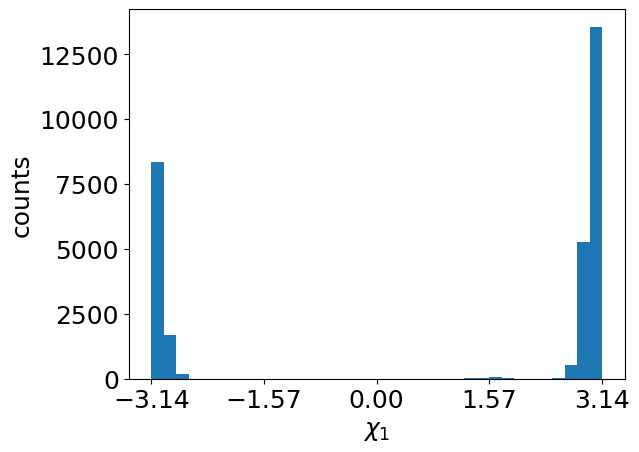

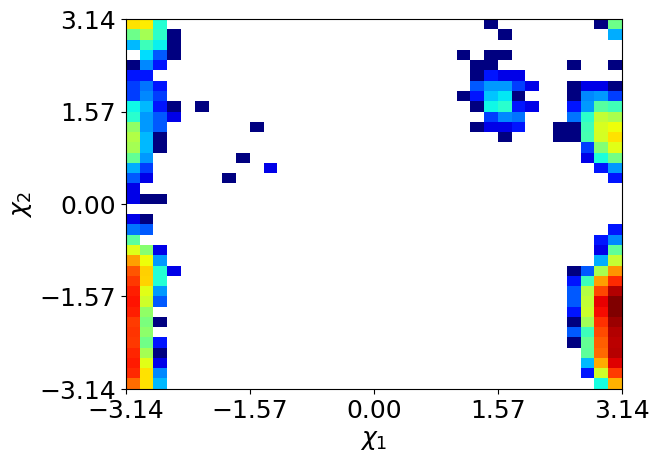

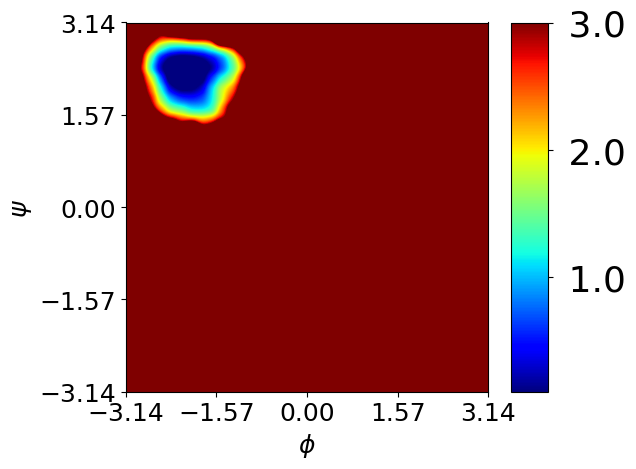

Residue 66


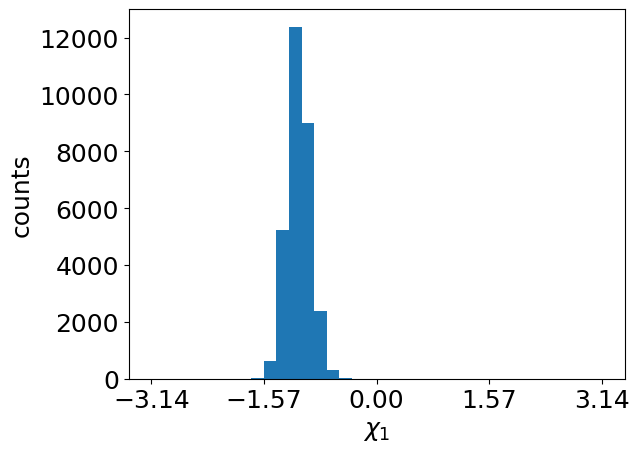

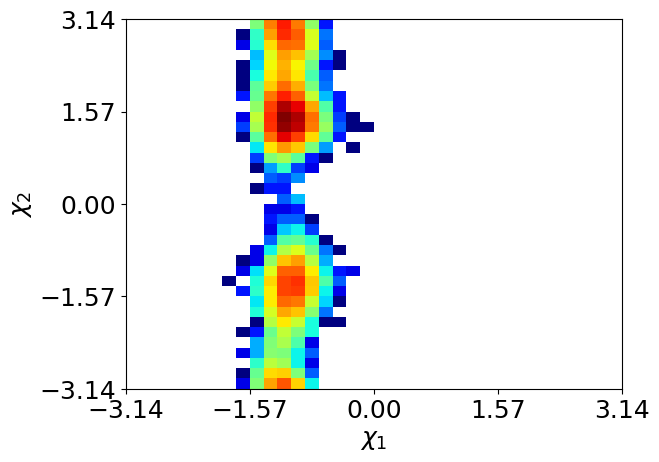

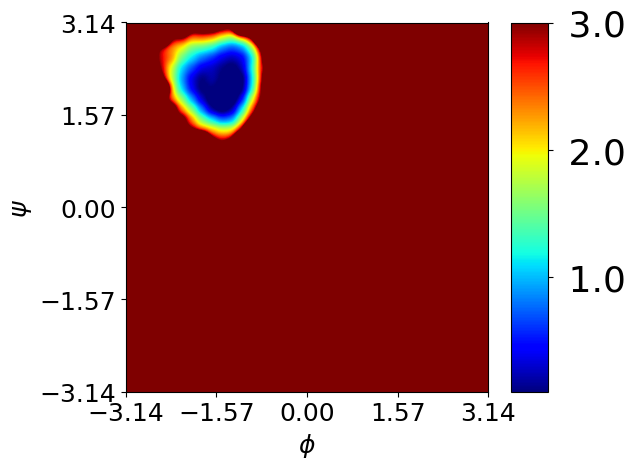

Residue 91


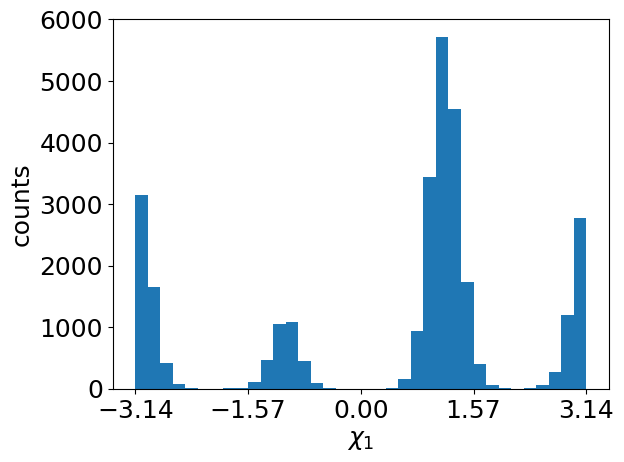

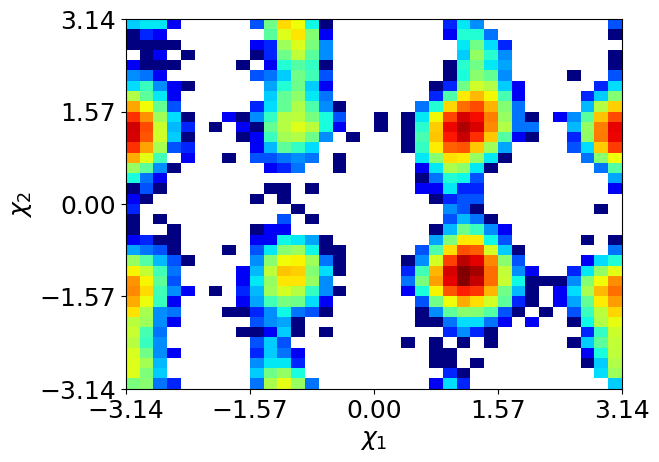

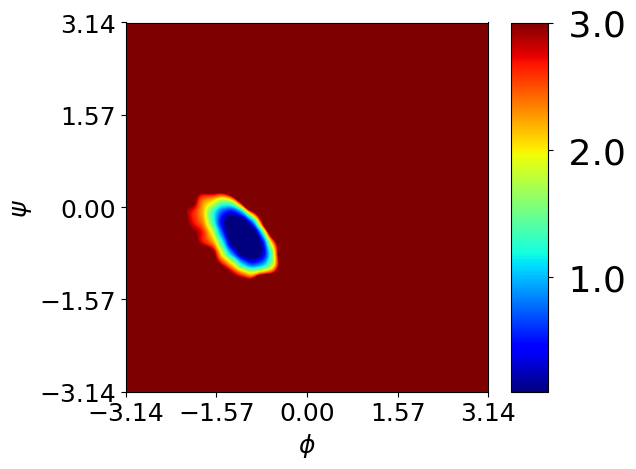

Residue 120


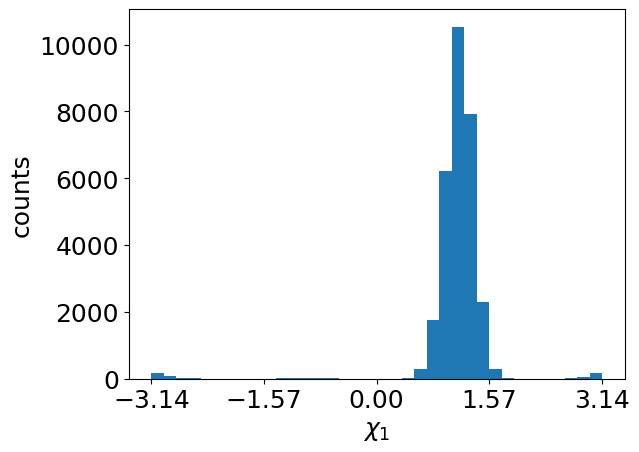

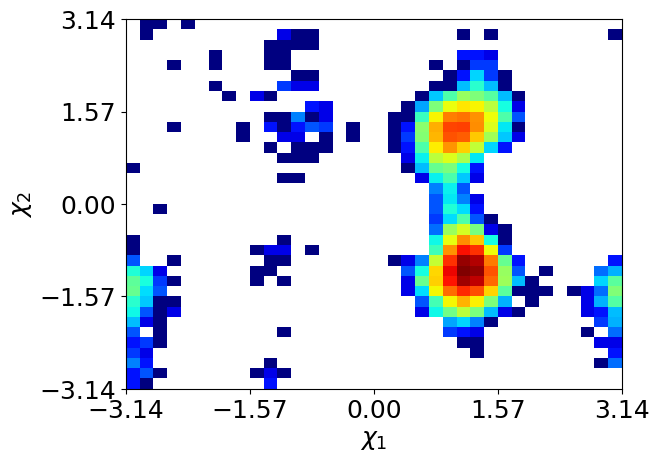

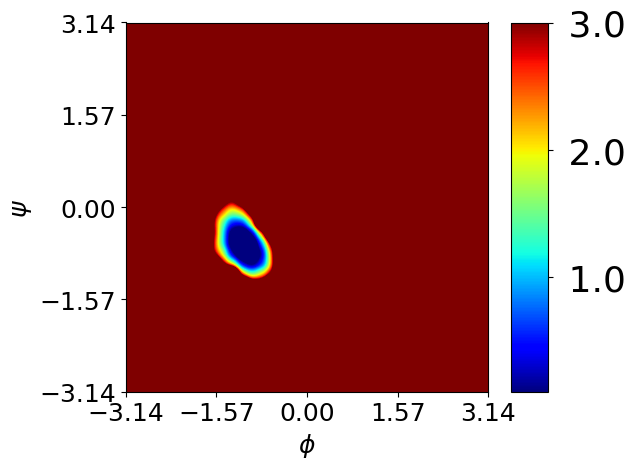

Residue 177


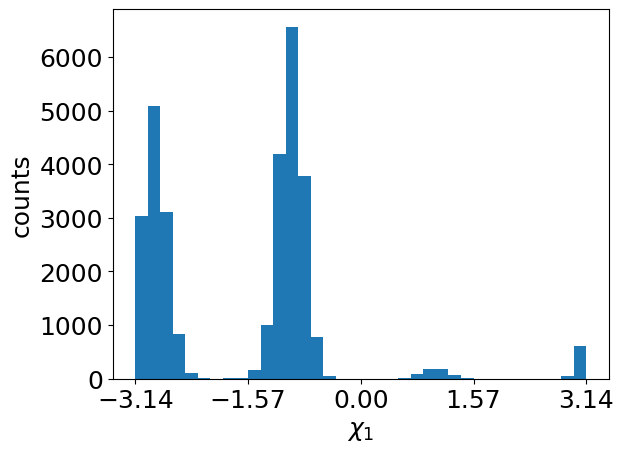

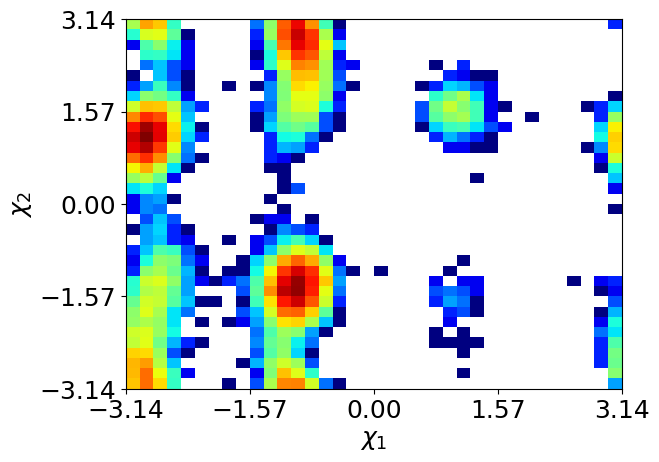

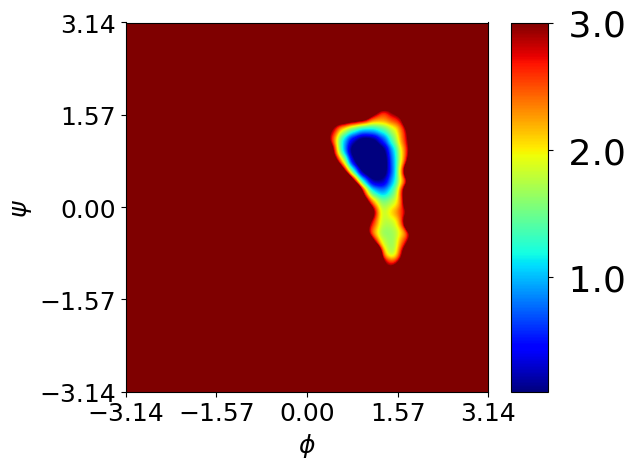

Residue 205


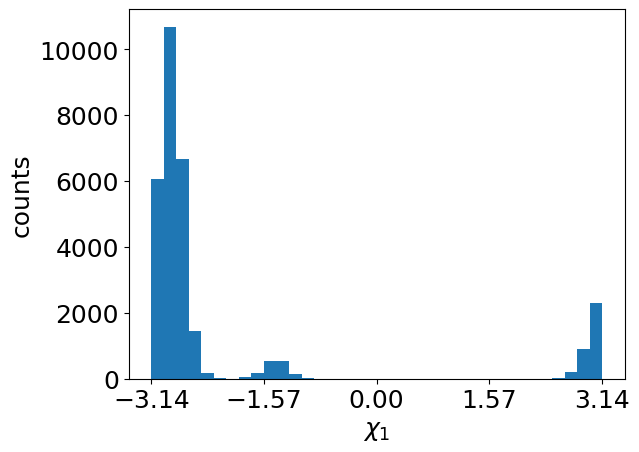

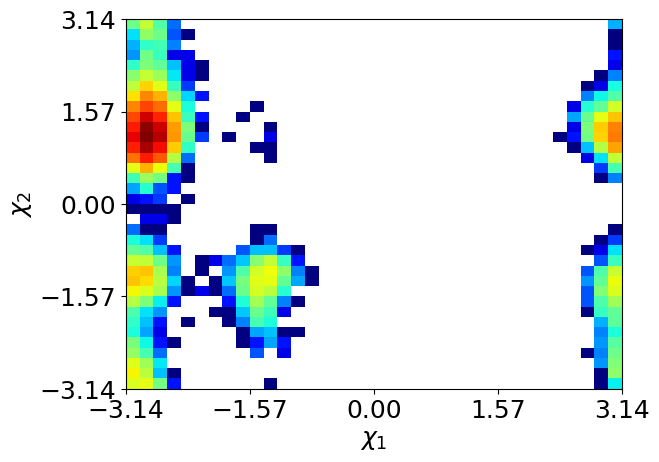

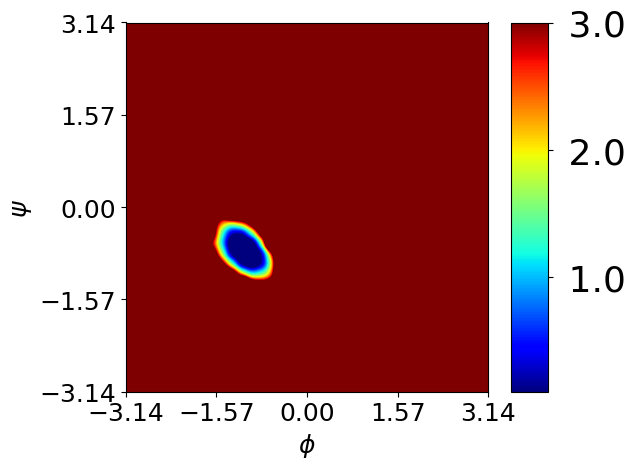

Residue 216


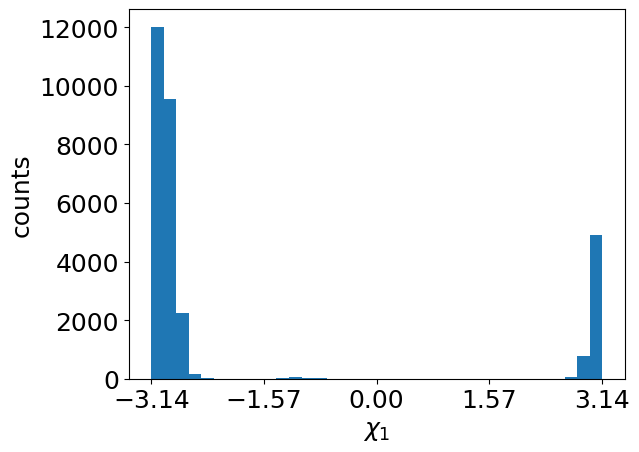

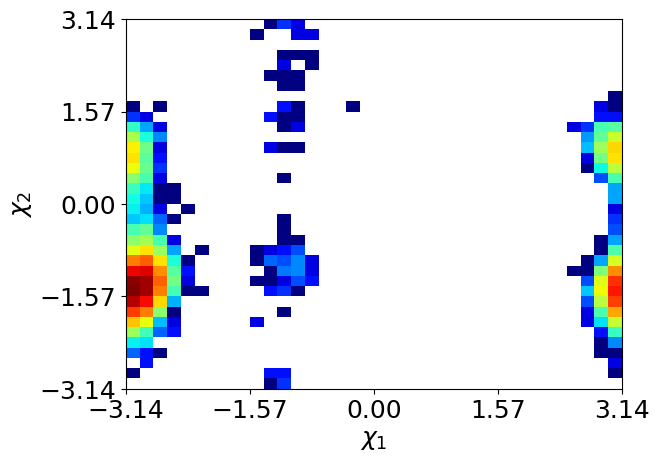

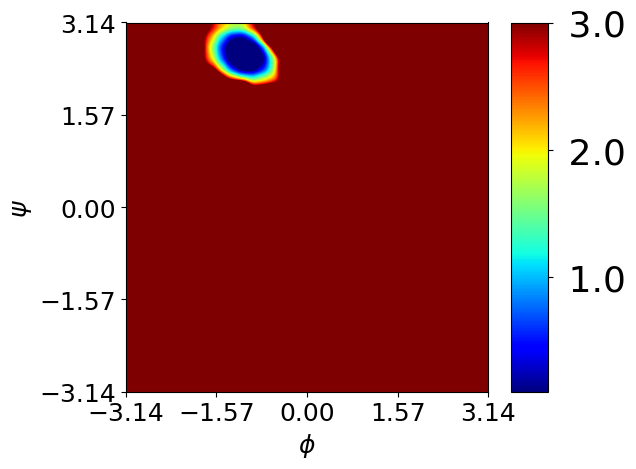

<Figure size 640x480 with 0 Axes>

In [64]:
for i in HIS_resnums:
    print("Residue",i)
    plot_chi(i)
    plt.clf()
    plot_phipsi_FES(i)
    plt.clf()

Residue 11


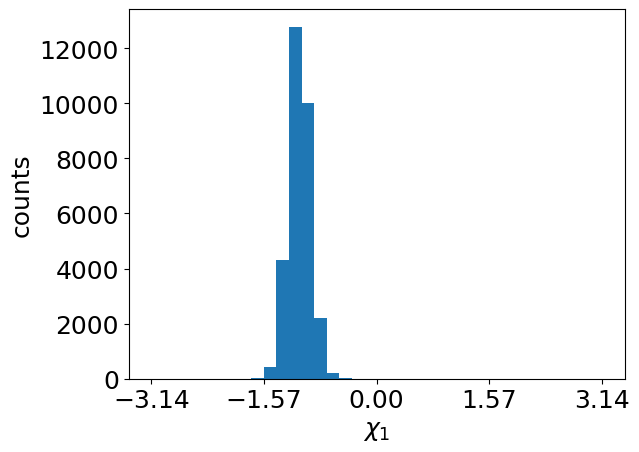

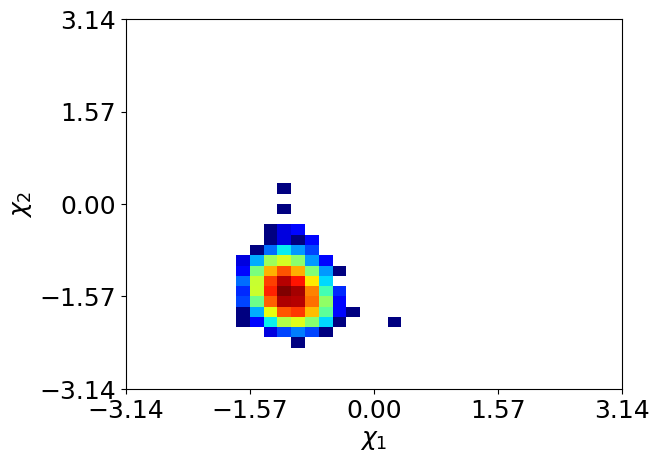

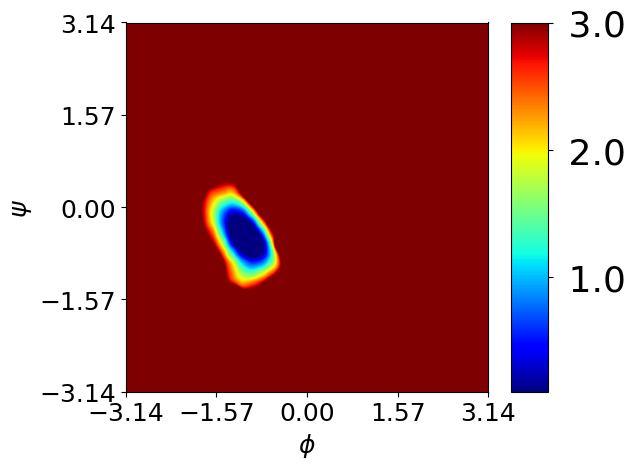

Residue 42


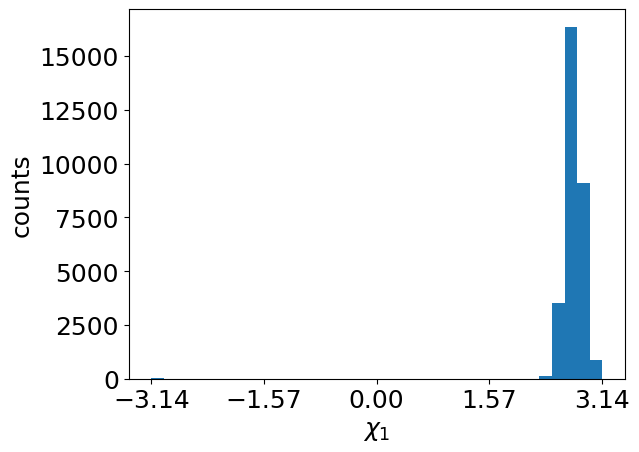

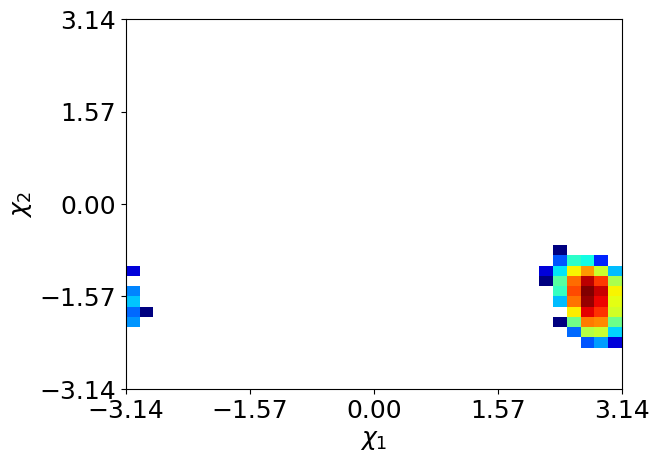

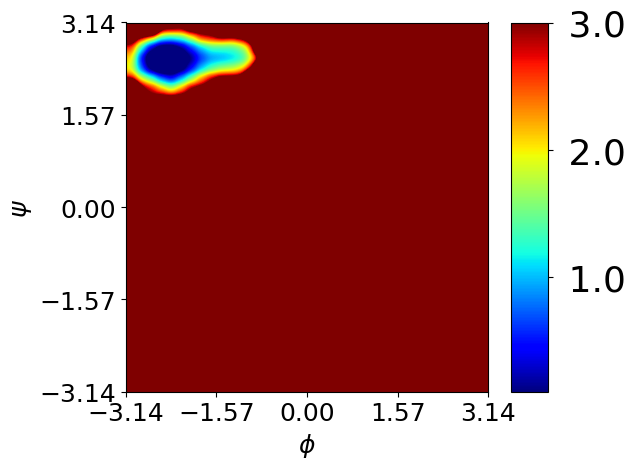

Residue 62


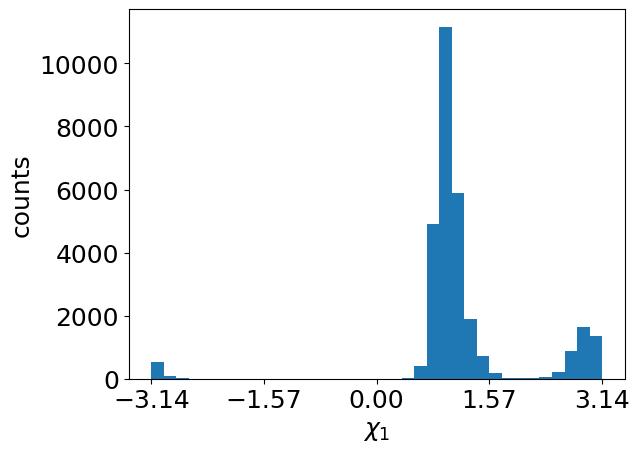

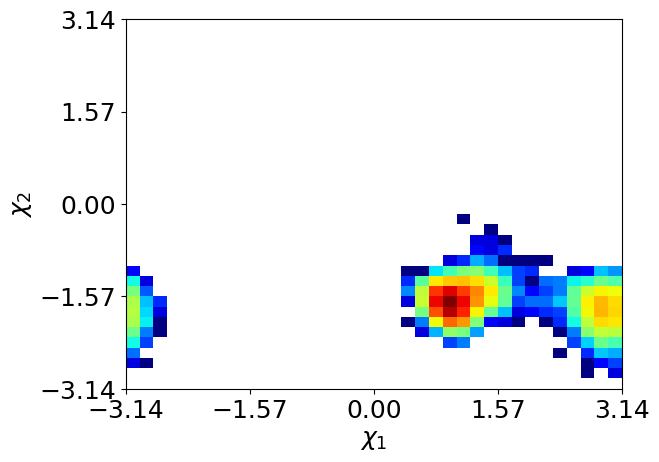

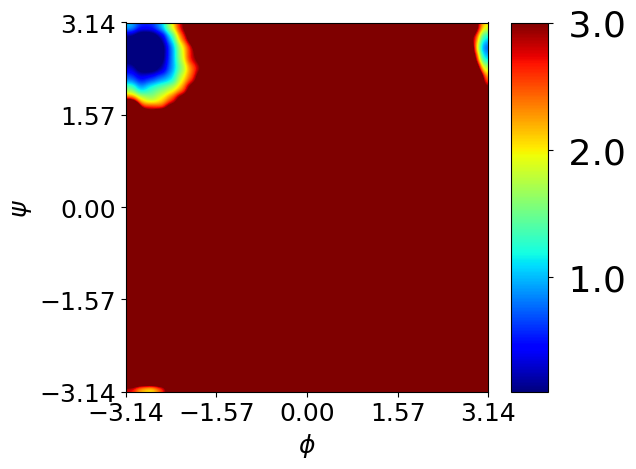

Residue 65


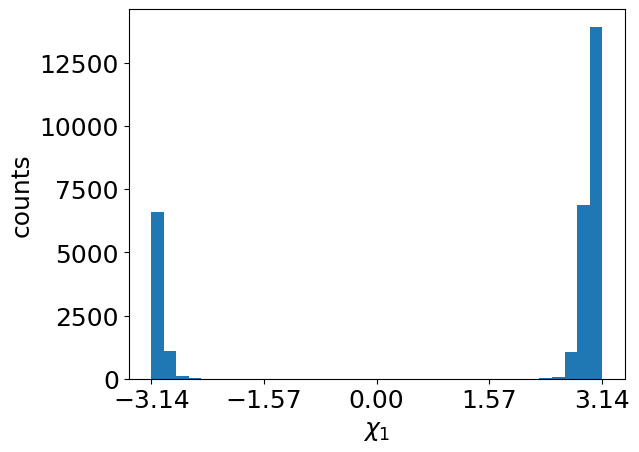

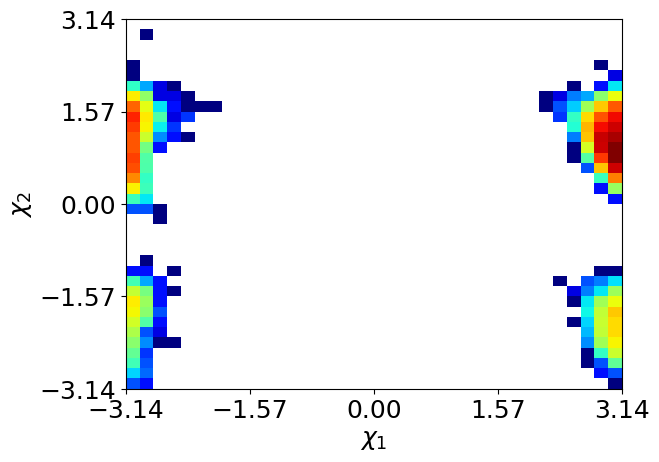

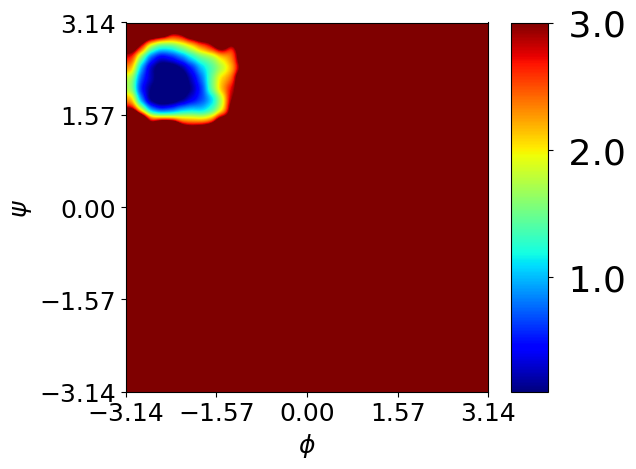

Residue 124


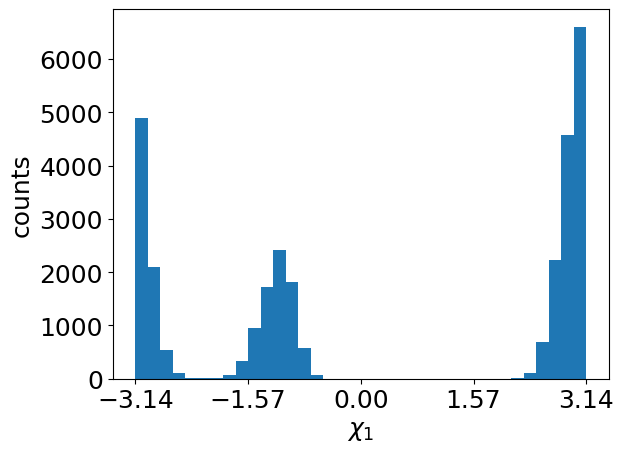

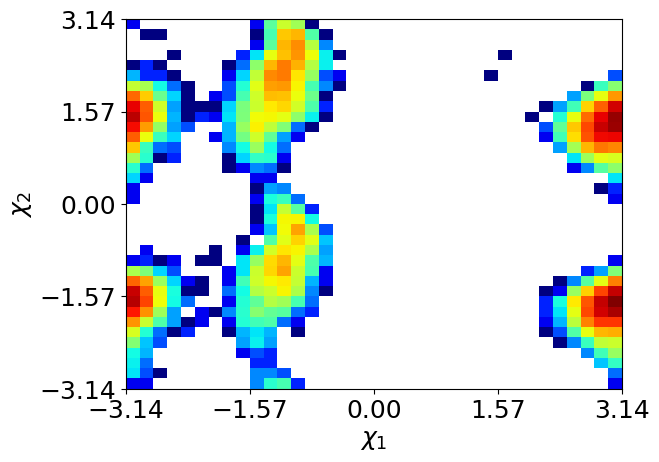

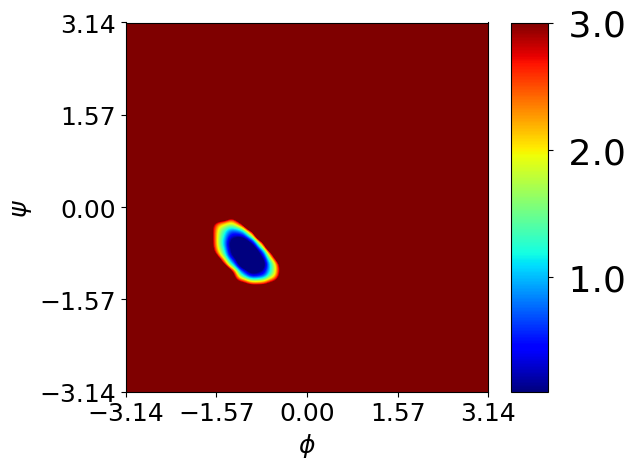

Residue 128


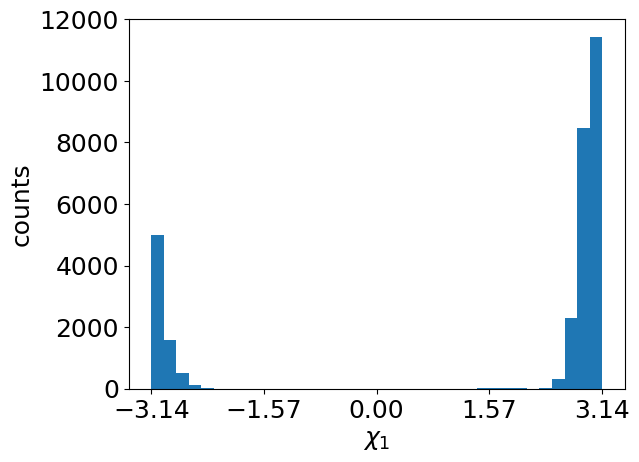

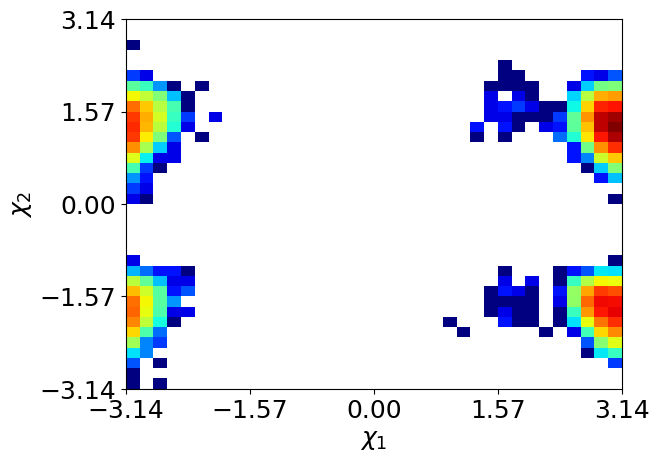

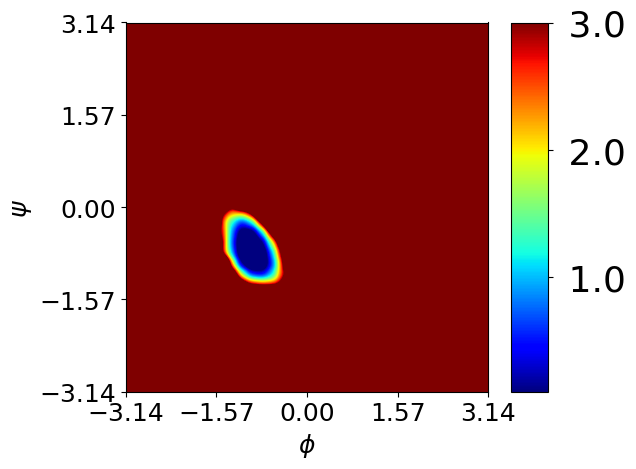

Residue 141


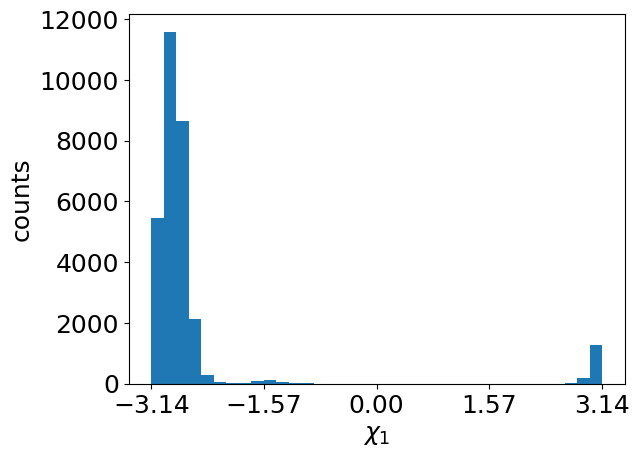

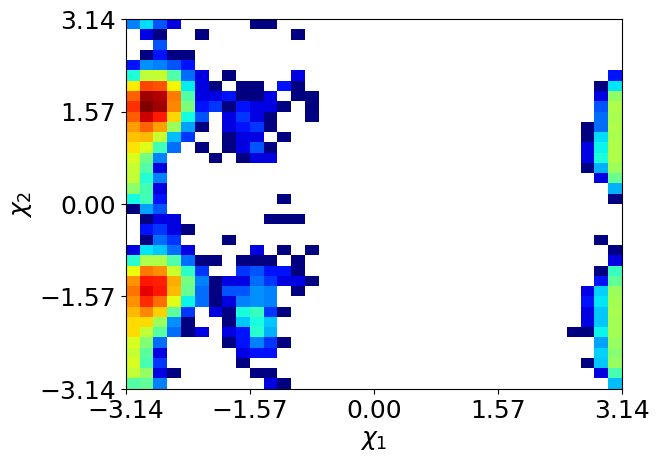

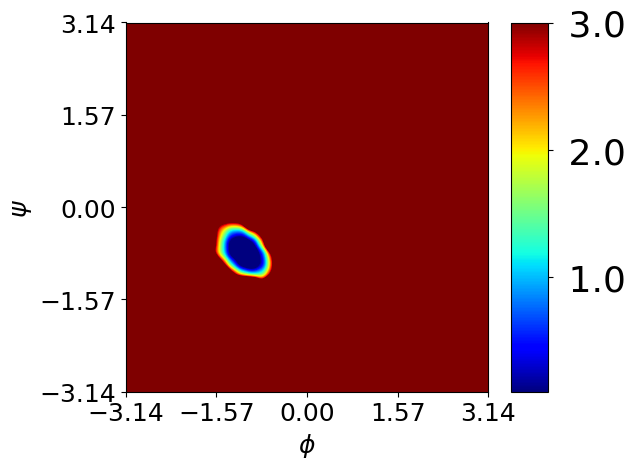

Residue 204


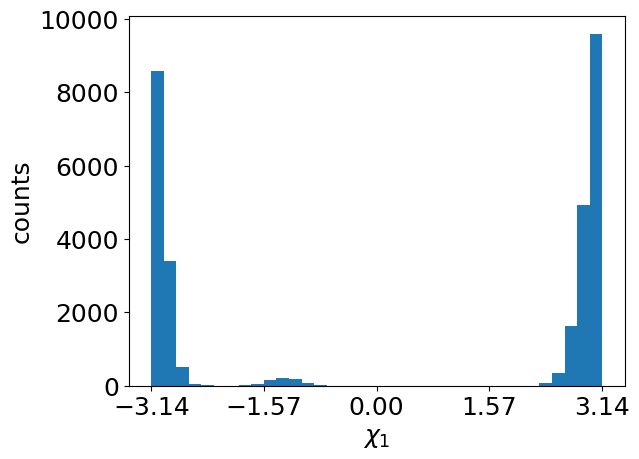

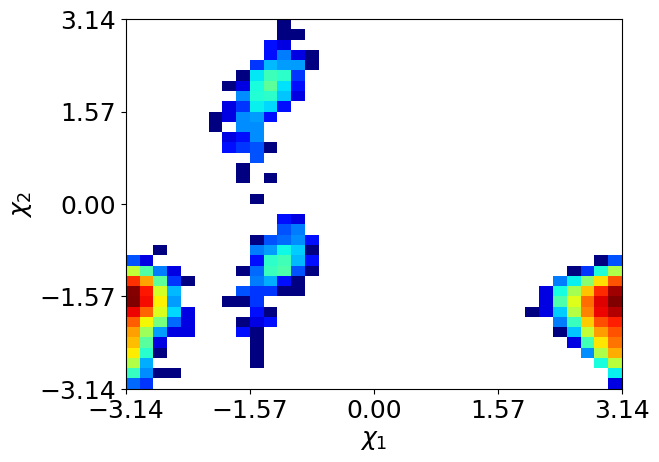

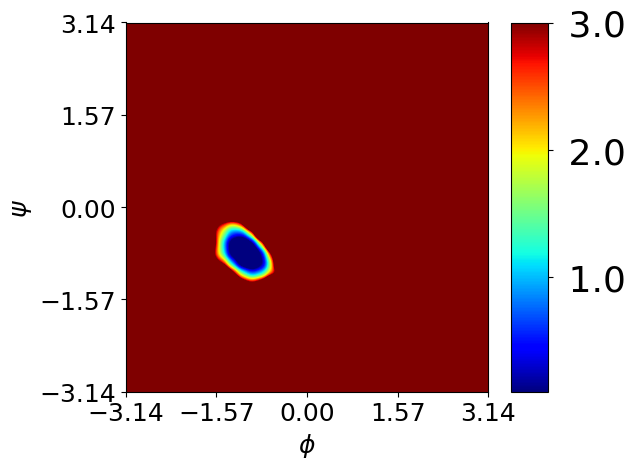

Residue 226


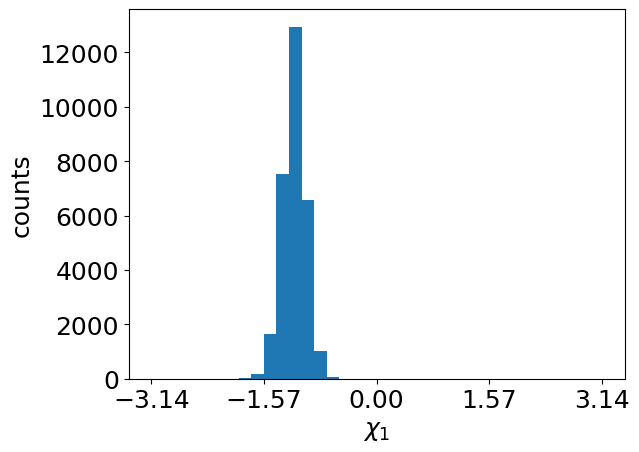

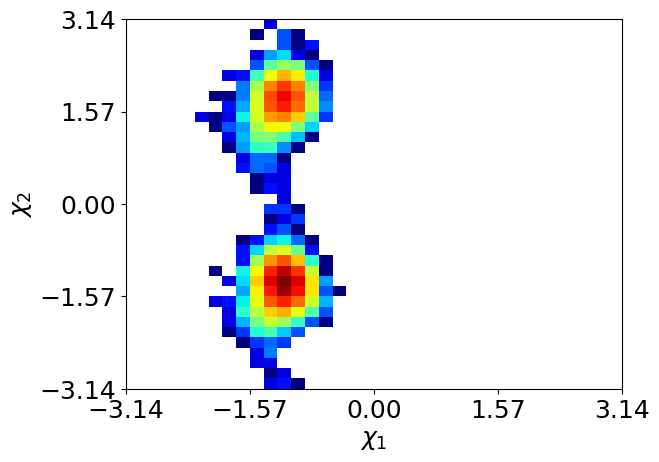

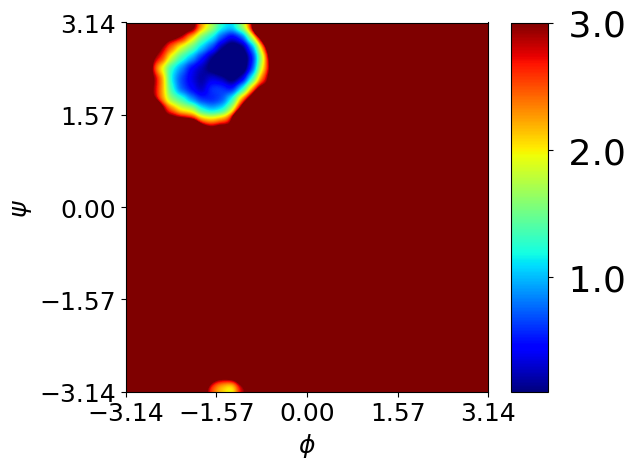

Residue 231


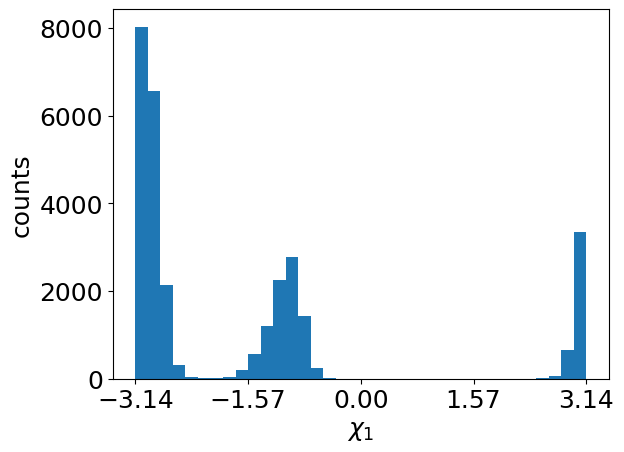

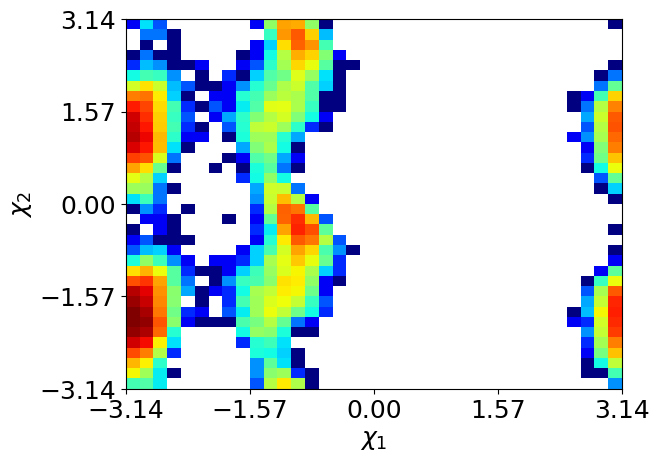

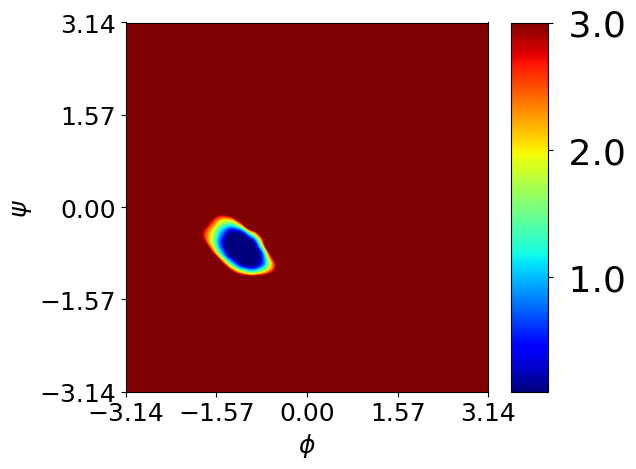

<Figure size 640x480 with 0 Axes>

In [66]:
for i in TYR_resnums:
    print("Residue",i)
    plot_chi(i)
    plt.clf()
    plot_phipsi_FES(i)
    plt.clf()

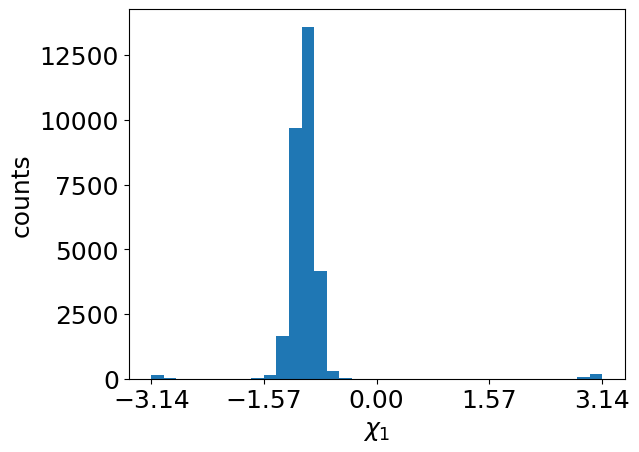

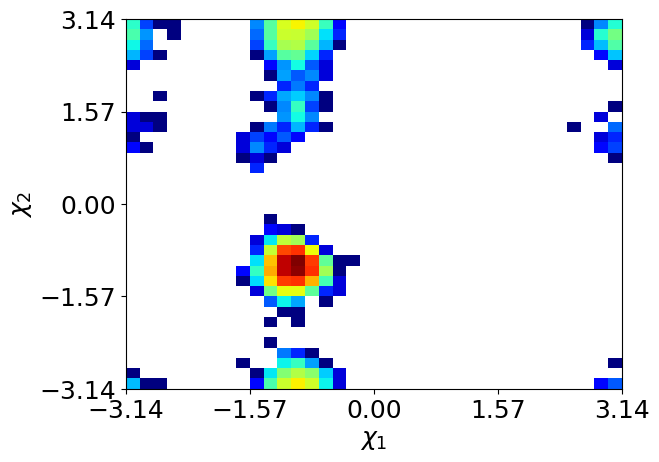

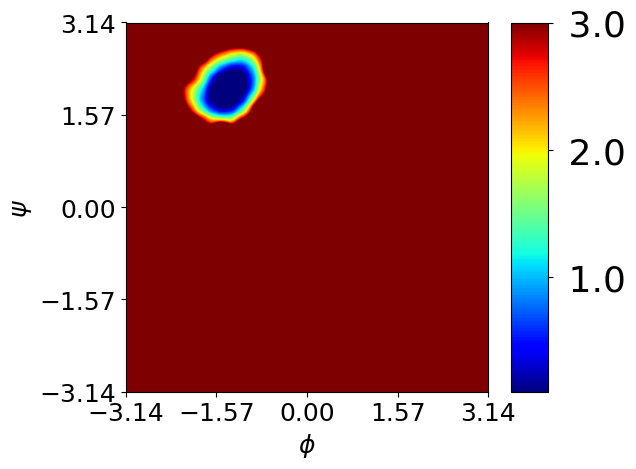

<Figure size 640x480 with 0 Axes>

In [67]:
plot_chi(8)
plt.clf()
plot_phipsi_FES(8)
plt.clf()

In [280]:
resnum = 382

phis = dihedral_dict['phi'].get(resnum, None)

if psis is not None:
    # Select every 5th frame
    phis_selected = phis[::5]
    
    b1_idx = np.where(phis_selected < -2)[0]
    b2_idx = np.where(phis_selected > -2)[0]
    
    # picks every 5th frame (makes it easier to see)
    b1_idx_original = b1_idx * 5
    b2_idx_original = b2_idx * 5
    
    print("Frames of residue", resnum, "in basin 1:", b1_idx_original)
    print("Frames of residue", resnum, "in basin 2:", b2_idx_original)
else:
    print("No frames in either basin for", resnum)

Frames of residue 382 in basin 1: [  55   60   65   75   80  140  145  150  155  160  180  205  220  260
  290  300  305  345  350  355 1075 1125 1445 1495 1615 2210 2275 2370
 2375 2430 2455 2475 2625 2775 2815 3060 3155 3200 3245 3250 3255 3260
 3265 3270 3275 3280 3285 3290 3295 3300 3305 3310 3315 3320 3325 3330
 3335 3340 3345 3350 3355 3360 3370 3375 3380 3385 3390 3395 3400 3405
 3410 3430 3435 3440 3445 3450 3455 3460 3465 3470 3475 3480 3485 3490
 3495 3500 3505 3510 3515 3520 3525 3530 3535 3540 3545 3550 3555 3560
 3565 3570 3575 3580 3585 3590 3595 3600 3605 3610 3615 3620 3625 3630
 3635 3640 3645 3650 3655 3660 3665 3670 3675 3680 3685 3690 3695 3700
 3705 3710 3715 3720 3725 3730 3735 3740 3745 3750 3755 3760 3765 3770
 3775 3780 3785 3790 3795 3800 3805 3810 3815 3825 3830 3835 3840 3845
 3850 3855 3860 3865 3870 3875 3880 3890 3895 3900 3905 3910 3915 3920
 3925 3930 3935 3940 3945 3950 3955 3960 3965 3970 3975 3980 3985 3990
 3995]
Frames of residue 382 in basin 2: [ 

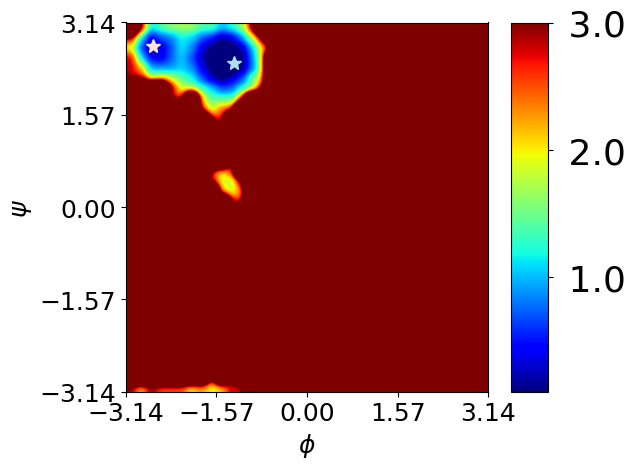

In [288]:
# pick frames for basin 1 and for basin 2
def plot_phipsi_two_frames(res, frame1, frame2):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['psi'][res],dihedral_dict['phi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()
 plt.plot(dihedral_dict['phi'][res][frame1], dihedral_dict['psi'][res][frame1], color="mistyrose", marker="*", markersize=10)
 plt.plot( dihedral_dict['phi'][res][frame2], dihedral_dict['psi'][res][frame2], color="powderblue", marker="*", markersize=10)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return

plot_phipsi_two_frames(382, 2375, 2515)

***Images of PHE382 in frame 2375 (in pink) indicative of energy basin 1 (pink star), and PHE 382 in frame 2515 (in blue) indicative of energy basin 2 (blue star). Both conformations appear energetically favorable as there is no obvious strain or clashing of this residue in either conformation, and the residue remains in a solvent buried position with nearby hydrophobic residues. Additionally, the rotomer in blue appears to be stabilized by pi stacking interactions with the nearby HIS 361 while the pink rotomer is not. 

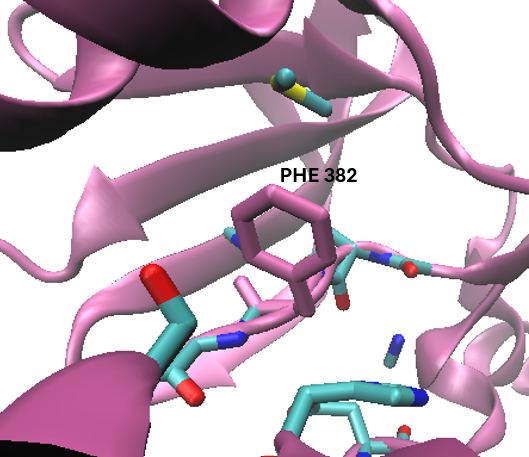
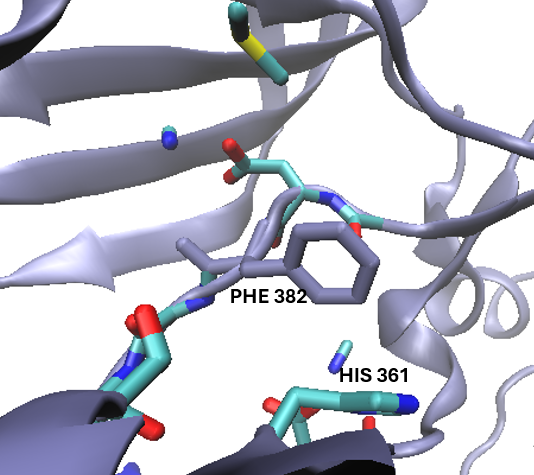
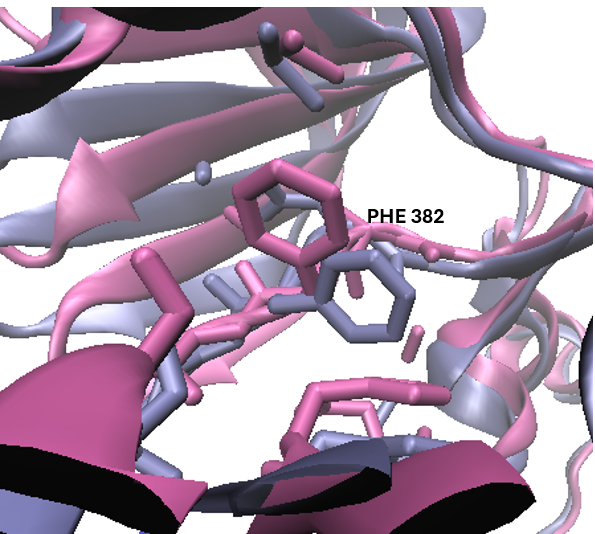

***Challenge Problem 2***

**Identify a residue with phi/psi basins that favor distinct rotamers and make a plot of chi distributions for different regions of the phi/psi basins**
Note: This question was solved with Michelle :)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


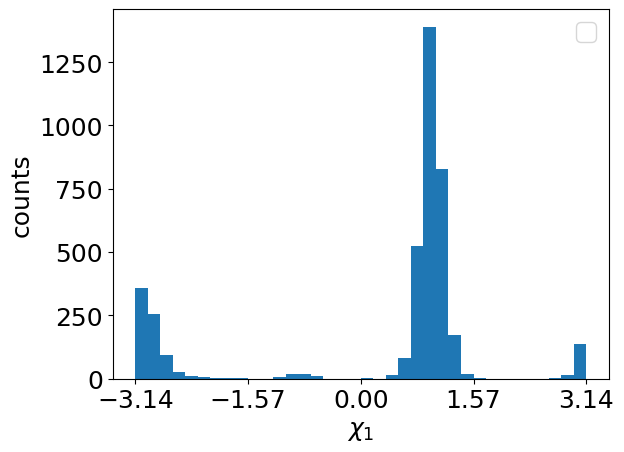

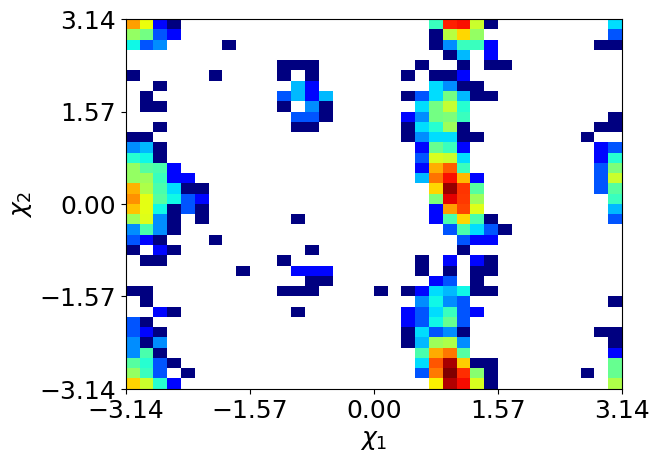

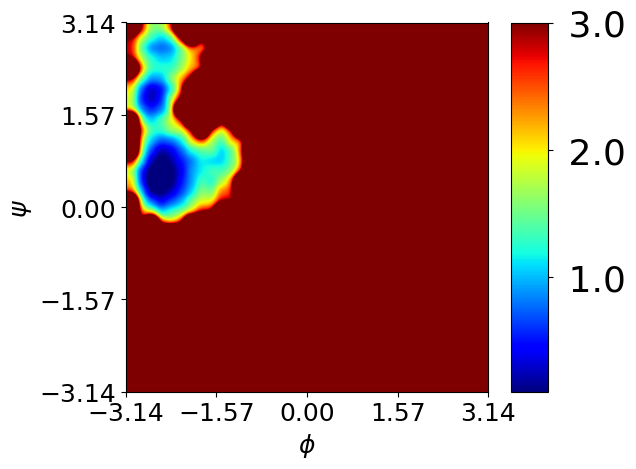

<Figure size 640x480 with 0 Axes>

In [292]:
#Find a residue with multiple rotomers and phi psi energy basins
plot_chi(363)
plt.clf()
plot_phipsi_FES(363)
plt.clf()

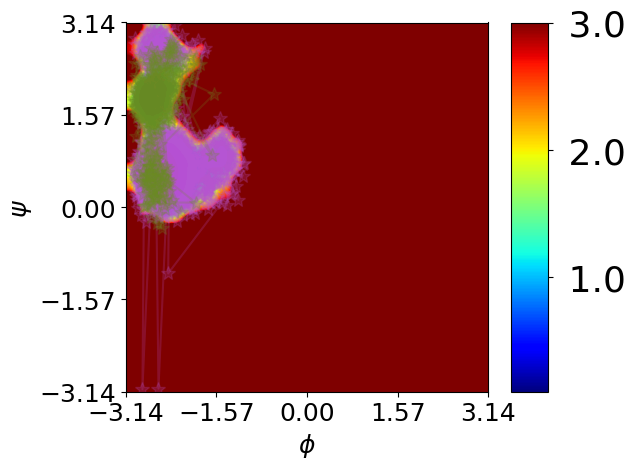

In [298]:
#residue 363 has multiple basins and distinct rotamers. 
#Now I will check to see if these energy basins favor one rotomer or another. 
res = 363
phis = dihedral_dict['phi'][res]
psis = dihedral_dict['psi'][res]
chi1s = dihedral_dict["chi1"][res]

# basins 1 and 2 roughly
b1_chi = np.where((chi1s < 1.57 ) & (chi1s > 0))
b2_chi = np.where((np.abs(chi1s) < np.pi ) &  (np.abs(chi1s)> np.pi - 0.5))
def plot_phipsi_with_frames(res, frames1, frames2):
 free_energy,xedges,yedges=np.histogram2d(dihedral_dict['psi'][res],dihedral_dict['phi'][res],36,[[-3.14,3.14],[-3.14,3.14]],density=True,weights=None)
 free_energy=np.log(np.flipud(free_energy)+.000001)
 T=300                                                                                                  
 kbT=T*0.008314/4.184 # kT in kcal/mol
 dG=-(kbT)*free_energy #Convert to kcal/mol
 im=plt.imshow(dG, interpolation='gaussian',extent=[yedges[0], yedges[-1], xedges[0], xedges[-1]],cmap='jet',aspect='auto')
 cbar_ticks=[0,1,2,3]
 cb = plt.colorbar(ticks=cbar_ticks, format=('% .1f'), aspect=10) # grab the Colorbar instance
 imaxes = plt.gca()
 plt.plot(dihedral_dict['phi'][res][frames1], dihedral_dict['psi'][res][frames1], color="mediumorchid", marker="*", markersize=10, alpha = 0.2)
 plt.plot( dihedral_dict['phi'][res][frames2], dihedral_dict['psi'][res][frames2], color="olivedrab", marker="*", markersize=10, alpha = 0.2)
 plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.yticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
 plt.xlabel('$\phi$', size=18)
 plt.ylabel('$\psi$', size=18)
 plt.tick_params(labelsize=18)
 plt.axes(cb.ax)
 plt.clim(vmin=0.1,vmax=3.0)
 plt.yticks(size='26')
 plt.tight_layout()
 plt.show()
 return

plot_phipsi_with_frames(363, b1_chi, b2_chi)

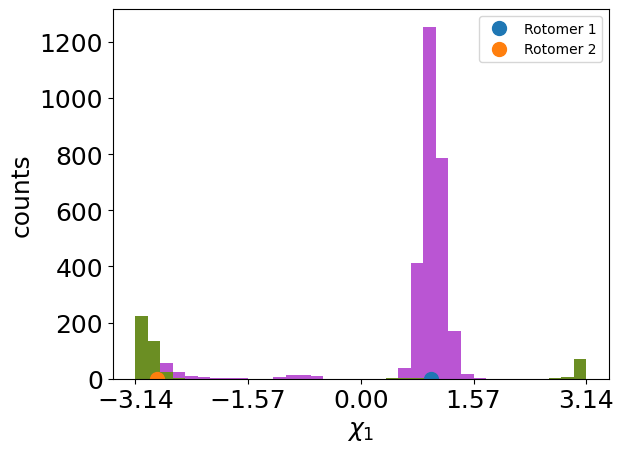

In [296]:
res = 363
phis = dihedral_dict['phi'][res]
psis = dihedral_dict['psi'][res]
chi1s = dihedral_dict["chi1"][res]

# basins 1 and 2 roughly
b1_idx= np.where(psis <1.2)[0]
b2_idx = np.where((psis >1.5) & (psis < 2))[0]

plt.hist(dihedral_dict['chi1'][res][b1_idx],bins=36,range=[-3.14,3.14], color= "mediumorchid", alpha=1)   
plt.hist(dihedral_dict['chi1'][res][b2_idx],bins=36,range=[-3.14,3.14], color = "olivedrab", alpha=1)        
frames_to_highlight=[63, 1811]
if frames_to_highlight:
            for idx, frame_num in enumerate(frames_to_highlight, start=1):
                chi1_value = dihedral_dict['chi1'][res][frame_num]
                label = f'Rotomer {idx}'
                plt.plot(chi1_value, 0, 'o', markersize=10, label=label)

plt.xticks([-3.14,-3.14/2,0,3.14/2,3.14],fontsize=35)
plt.xlabel('$\chi_1$', size=18)
plt.ylabel('counts', size=18)
plt.tick_params(labelsize=18)
plt.legend()
plt.show()

***As you can see above in the free energy plot as well as the chi1 histogram, basin 1 (b1_idx) favors the rotomer with chi1 values between 0 and 1.57, while basin 2 (b2_idx) favors the rotomer with chi1 values around pi. 